# Analysis of NEISS Product Injury Database

The tables were loaded from the CPSC website. This is the link to query the data. No filters were used.
<br>
https://www.cpsc.gov/cgibin/NEISSQuery/

## Data Engineering

### Import the libraries

In [1]:
import os, time
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Activate SQLite3

In [2]:
neiss_conn = sqlite3.connect('neiss.db')

This allows us to create a .db file for quicker read and write times.

### Process raw excel files into a database

In [84]:
%%time
fact_directory = 'NEISS_All_Data/Fact Tables/'

dfs = []

# This code iterates through the list of documents in the directory 
# and loads them into a list of dataframes.
''' 
for filename in os.listdir(fact_directory): 
    filename_l = filename.lower() 
    if filename_l.endswith('xlsx') and filename_l.startswith('neiss'): 
        filepath = os.path.join(fact_directory, filename) 
        df = pd.read_excel(filepath)
        dfs.append(df)
data_load_finish = time.time() - start_time
print(data_load_finish)

# Concatenate the list of dataframes into one large dataframe
all_neiss = pd.concat(dfs, ignore_index=True) 
'''

# Loads the files individually and processes them into the database
df = pd.read_excel('NEISS_All_Data/Fact Tables/NEISS_2003.XLSX')
df.to_sql('all_neiss', neiss_conn, if_exists = 'append', index=True)

CPU times: user 1min 39s, sys: 5.12 s, total: 1min 44s
Wall time: 1min 47s


347375

Sample times for individual files Macbook air 2019 1.6 Ghz Dual-Core Intel:
<br>2:16
<br>1:57
<br>2:11
<br>2:11
<br>2:44
<br>2:37
<br>2:09
<br>2:15
<br>2:03
<br>(after plugging it in)
<br>1:55
<br>1:51
<br>1:44
<br><br>
It took just over 2 minutes on average to load each file into the database. The macbook was pushing the excel files into the cloud, so the iteration code stopped working once it reached a file that had happened to.

Each file is about 40mb and contains about 300,000 rows. The maximum size for an excel table is about 1,000,000 rows.

The total size of all of the 20 Excel files together is about 800mb.

### Check the fact table data

In [8]:
%%time

all_neiss = pd.read_sql(
'''

SELECT * FROM all_neiss

'''
,neiss_conn)
all_neiss

CPU times: user 1min 20s, sys: 53.5 s, total: 2min 13s
Wall time: 2min 14s


,index,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,...,Drug,Product_1,Product_2,Product_3,Narrative,Stratum,PSU,Weight,Other_Diagnosis,Other_Diagnosis_2
0,0,90101432,2009-01-01 00:00:00,5,1,3,HISPANIC,NaN,89,64,...,NaN,1807,0,0,5 YOM ROLLING ON FLOOR DOING A SOMERSAULT AND ...,V,61,15.3491,None,None
1,1,90101434,2009-01-01 00:00:00,51,1,1,None,NaN,77,53,...,NaN,899,0,0,"51 YOM C/O PAIN AND IRRITATION TO RIGHT EYE, H...",V,61,15.3491,None,None
2,2,90101435,2009-01-01 00:00:00,2,2,1,None,NaN,76,59,...,NaN,4057,0,0,2 YOF WAS RUNNING THROUGH HOUSE AND FELL INTO ...,V,61,15.3491,None,None
3,3,90101436,2009-01-01 00:00:00,20,1,1,None,NaN,93,53,...,NaN,1884,0,0,20 YOM PUNCHED AND KICKED A WALL D/T DRINKING ...,V,61,15.3491,None,None
4,4,90101437,2009-01-01 00:00:00,20,1,1,None,NaN,34,57,...,NaN,3283,0,0,20 YOM FELL SNOW SKIING SUSTAINING A FRACTURED...,V,61,15.3491,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316556,347370,40605786,2003-05-31 00:00:00,2,2,2,None,NaN,76,53,...,NaN,827,0,0,PATIENT PULLED HAMMER DOWN AND HIT EYE; FACIAL...,C,8,6.1043,None,None
7316557,347371,40605787,2003-05-31 00:00:00,206,2,1,None,NaN,30,53,...,NaN,1807,4057,0,"BABYSITTER DROPPED PATIENT ONTO FLOOR, HIT LEF...",C,8,6.1043,None,None
7316558,347372,40605789,2003-05-31 00:00:00,2,2,2,None,NaN,76,59,...,NaN,679,4057,0,PATIENT FELL OFF COUCH HITTING HEAD ON WOODEN ...,C,8,6.1043,None,None
7316559,347373,40605791,2003-05-31 00:00:00,11,1,2,None,NaN,76,59,...,NaN,1205,1871,0,"PATIENT PLAYING BASKETBALL, FELL INTO METAL FE...",C,8,6.1043,None,None


In [9]:
all_neiss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316561 entries, 0 to 7316560
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   index              int64  
 1   CPSC_Case_Number   int64  
 2   Treatment_Date     object 
 3   Age                int64  
 4   Sex                int64  
 5   Race               int64  
 6   Other_Race         object 
 7   Hispanic           float64
 8   Body_Part          int64  
 9   Diagnosis          int64  
 10  Diagoth            object 
 11  Body_Part_2        float64
 12  Diagnosis_2        float64
 13  Diag2oth           object 
 14  Disposition        int64  
 15  Location           int64  
 16  Fire_Involvement   int64  
 17  Alcohol            float64
 18  Drug               float64
 19  Product_1          int64  
 20  Product_2          int64  
 21  Product_3          int64  
 22  Narrative          object 
 23  Stratum            object 
 24  PSU                int64  
 25  Weight            

This is the schema for the fact table. Right now, there are over 7 million rows and 27 columns.

#### This query is to make sure that all of the files made it to the database

In [7]:
%%time

view = pd.read_sql(
    
'''

SELECT DISTINCT SUBSTRING(Treatment_Date, 1, 4) AS first_four_digits
FROM all_neiss
ORDER BY first_four_digits Desc


'''
,neiss_conn)
view

CPU times: user 1.84 s, sys: 1.1 s, total: 2.95 s
Wall time: 3.55 s


,first_four_digits
0,2022
1,2021
2,2020
3,2019
4,2018
5,2017
6,2016
7,2015
8,2014
9,2013


### Remove duplicates

In [11]:
%%time

all_neiss = pd.read_sql(
'''

SELECT DISTINCT *
from all_neiss

'''
,neiss_conn)
all_neiss

CPU times: user 1min 27s, sys: 50.2 s, total: 2min 17s
Wall time: 2min 23s


,index,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,...,Drug,Product_1,Product_2,Product_3,Narrative,Stratum,PSU,Weight,Other_Diagnosis,Other_Diagnosis_2
0,0,90101432,2009-01-01 00:00:00,5,1,3,HISPANIC,NaN,89,64,...,NaN,1807,0,0,5 YOM ROLLING ON FLOOR DOING A SOMERSAULT AND ...,V,61,15.3491,None,None
1,1,90101434,2009-01-01 00:00:00,51,1,1,None,NaN,77,53,...,NaN,899,0,0,"51 YOM C/O PAIN AND IRRITATION TO RIGHT EYE, H...",V,61,15.3491,None,None
2,2,90101435,2009-01-01 00:00:00,2,2,1,None,NaN,76,59,...,NaN,4057,0,0,2 YOF WAS RUNNING THROUGH HOUSE AND FELL INTO ...,V,61,15.3491,None,None
3,3,90101436,2009-01-01 00:00:00,20,1,1,None,NaN,93,53,...,NaN,1884,0,0,20 YOM PUNCHED AND KICKED A WALL D/T DRINKING ...,V,61,15.3491,None,None
4,4,90101437,2009-01-01 00:00:00,20,1,1,None,NaN,34,57,...,NaN,3283,0,0,20 YOM FELL SNOW SKIING SUSTAINING A FRACTURED...,V,61,15.3491,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316556,347370,40605786,2003-05-31 00:00:00,2,2,2,None,NaN,76,53,...,NaN,827,0,0,PATIENT PULLED HAMMER DOWN AND HIT EYE; FACIAL...,C,8,6.1043,None,None
7316557,347371,40605787,2003-05-31 00:00:00,206,2,1,None,NaN,30,53,...,NaN,1807,4057,0,"BABYSITTER DROPPED PATIENT ONTO FLOOR, HIT LEF...",C,8,6.1043,None,None
7316558,347372,40605789,2003-05-31 00:00:00,2,2,2,None,NaN,76,59,...,NaN,679,4057,0,PATIENT FELL OFF COUCH HITTING HEAD ON WOODEN ...,C,8,6.1043,None,None
7316559,347373,40605791,2003-05-31 00:00:00,11,1,2,None,NaN,76,59,...,NaN,1205,1871,0,"PATIENT PLAYING BASKETBALL, FELL INTO METAL FE...",C,8,6.1043,None,None


In this case there are no duplicates, but if we wanted to create a table with no duplicates, the SQL code would be:
<br><br>
CREATE TABLE neiss_WO_duplicates AS<br>
SELECT DISTINCT <br>
FROM all_neiss
<br><br>
then to drop table:<br>
DROP TABLE all_neiss
<br><br>
*This would need to be done via neiss_conn.execute()*

In [ ]:
all_neiss.to_sql('all_neiss', neiss_conn, if_exists='replace', index=True)

### Extract the Year

The year is extracted from the Treatment_Date column for easy analysis

#### Add the year column to the table

In [17]:
neiss_conn.execute(
'''

ALTER TABLE all_neiss
ADD COLUMN year INT

'''
)

#### Calculate the values from the date column

In [110]:
neiss_conn.execute(
'''

UPDATE all_neiss
SET year = strftime('%Y',Treatment_Date)

'''
)

Because we are using SQLite3, the function being used is strftime(). YEAR([column]) would work in most cases. '%Y' is capitalized to represent that we need a four-character year.

In [116]:
view = pd.read_sql(
'''

SELECT DISTINCT year
FROM all_neiss


'''
,neiss_conn)

view.values

array([[2009],
       [2005],
       [2013],
       [2012],
       [2022],
       [2021],
       [2020],
       [2019],
       [2018],
       [2017],
       [2016],
       [2015],
       [2014],
       [2011],
       [2010],
       [2008],
       [2007],
       [2006],
       [2004],
       [2003]])

There are no null or 0 values

In [117]:
# Commit the changes to the database
neiss_conn.commit()

In [41]:
# Set the pandas display.max_colwidth attribute to None
# so the entire contents of the cell can be seen
pd.set_option('display.max_colwidth', None)

# The is SQL query returns the columns with their types in the style
# of a SQL code
view = pd.read_sql(
'''

SELECT sql FROM sqlite_master WHERE type = 'table' AND name = 'all_neiss';


'''
,neiss_conn)
view

,sql
0,"CREATE TABLE ""all_neiss"" (\n""index"" INTEGER,\n ""CPSC_Case_Number"" INTEGER,\n ""Treatment_Date"" TIMESTAMP,\n ""Age"" INTEGER,\n ""Sex"" INTEGER,\n ""Race"" INTEGER,\n ""Other_Race"" TEXT,\n ""Hispanic"" REAL,\n ""Body_Part"" INTEGER,\n ""Diagnosis"" INTEGER,\n ""Diagoth"" TEXT,\n ""Body_Part_2"" REAL,\n ""Diagnosis_2"" REAL,\n ""Diag2oth"" REAL,\n ""Disposition"" INTEGER,\n ""Location"" INTEGER,\n ""Fire_Involvement"" INTEGER,\n ""Alcohol"" REAL,\n ""Drug"" REAL,\n ""Product_1"" INTEGER,\n ""Product_2"" INTEGER,\n ""Product_3"" INTEGER,\n ""Narrative"" TEXT,\n ""Stratum"" TEXT,\n ""PSU"" INTEGER,\n ""Weight"" REAL,\n ""Other_Diagnosis"" TEXT,\n ""Other_Diagnosis_2"" REAL\n, year INT)"


In [7]:
# Reset the pandas setting back to default.
pd.reset_option('display.max_colwidth')

### Combine Columns

In the fact table we have three columns: Product_1, Product_2, and Product_3. The second two columns provide additional space if more than one product was involved in an injury. We need to combine these columns so that we can get the complete view of the products variable.

First we need to see how much the size of the data set will increase if we add the additional columns

In [10]:
# View the count of the three columns, when they are not equal to 0

view = pd.read_sql(
'''

SELECT COUNT(CASE WHEN Product_1 <> 0 THEN 1 ELSE NULL END) 
     + COUNT(CASE WHEN Product_2 <> 0 THEN 1 ELSE NULL END)
     + COUNT(CASE WHEN Product_3 <> 0 THEN 1 ELSE NULL END) AS count
FROM all_neiss;


'''
, neiss_conn)
view

,count
0,8313005


The output table would only be about a million rows larger than our current table. This is manageable, so we will proceed.

In [ ]:
neiss_conn.execute(
'''

CREATE TABLE neiss_all AS
SELECT *
FROM (
    SELECT all_neiss.*, product_1 AS Product_All
    FROM all_neiss
    WHERE Product_1 != 0
    UNION ALL
    SELECT all_neiss.*, product_2 AS Product_All
    FROM all_neiss
    WHERE Product_2 != 0
    UNION ALL
    SELECT all_neiss.*, product_3 AS Product_All
    FROM all_neiss
    WHERE Product_3 != 0
    
) AS Subquery



'''
)

In [3]:
view = pd.read_sql(
'''

SELECT *
FROM neiss_all


'''
, neiss_conn)
view

,index,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,...,Product_2,Product_3,Narrative,Stratum,PSU,Weight,Other_Diagnosis,Other_Diagnosis_2,year,Product_All
0,0,90101432,2009-01-01 00:00:00,5,1,3,HISPANIC,NaN,89,64,...,0,0,5 YOM ROLLING ON FLOOR DOING A SOMERSAULT AND ...,V,61,15.3491,None,None,2009,1807
1,1,90101434,2009-01-01 00:00:00,51,1,1,None,NaN,77,53,...,0,0,"51 YOM C/O PAIN AND IRRITATION TO RIGHT EYE, H...",V,61,15.3491,None,None,2009,899
2,2,90101435,2009-01-01 00:00:00,2,2,1,None,NaN,76,59,...,0,0,2 YOF WAS RUNNING THROUGH HOUSE AND FELL INTO ...,V,61,15.3491,None,None,2009,4057
3,3,90101436,2009-01-01 00:00:00,20,1,1,None,NaN,93,53,...,0,0,20 YOM PUNCHED AND KICKED A WALL D/T DRINKING ...,V,61,15.3491,None,None,2009,1884
4,4,90101437,2009-01-01 00:00:00,20,1,1,None,NaN,34,57,...,0,0,20 YOM FELL SNOW SKIING SUSTAINING A FRACTURED...,V,61,15.3491,None,None,2009,3283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313000,358454,200306247,2019-08-16 00:00:00,3,1,2,None,2.0,31,48,...,264,1135,"3YOM WITH BURN, PUT HOT CUP OF WATER/TEA OUT O...",C,10,4.8283,None,None,2019,1135
8313001,358460,200306262,2019-08-17 00:00:00,3,1,1,None,2.0,75,62,...,1807,676,3YOM FELL 4-5 STAIRS DOWN CARPETED STAIRS ONTO...,C,10,4.8283,None,None,2019,676
8313002,358577,200308374,2019-09-16 00:00:00,209,1,1,None,1.0,75,62,...,1807,676,9MOM ROLLED OFF BED (2FT HIGH) ONTO CARPET FLO...,C,10,4.8283,None,None,2019,676
8313003,358662,200314181,2019-12-31 00:00:00,67,2,4,None,2.0,75,62,...,4076,1884,67YOF P/W BLEEDING TO BACK OF HEADF AFTER FALL...,V,57,17.3778,None,None,2019,1884


In [ ]:
# Rename the all_neiss table

neiss_conn.execute(
'''

ALTER TABLE all_neiss RENAME TO all_neiss_x

'''
)

In [13]:
neiss_conn.commit()

The operation appears to be a success

### Load the dimension tables

In [38]:
dim_directory = 'NEISS_All_Data/Dimension Tables/'
dataframes = {}

# Loads the dimension tables into a dictionary

for filename in os.listdir(dim_directory):
    if filename.endswith('.xlsx'):
        filepath = os.path.join(dim_directory, filename)
        dataframe_name = filename.split('.')[0]  # Use the filename as the dataframe name
        dataframes[dataframe_name] = pd.read_excel(filepath)

There are a total of 11 dimension tables. The largest is the Product dimension table, with about 1100 rows.

### Load the dimension tables into the database

In [40]:
for dataframe_name, dataframe in dataframes.items():
    dataframe.to_sql(dataframe_name, neiss_conn, if_exists='replace', index=False)

### View all of the tables in the database

In [15]:
view = pd.read_sql(
'''

SELECT name FROM sqlite_master WHERE type='table'

'''
,neiss_conn)
view

,name
0,all_neiss_x
1,AgeLTwoDim
2,DispositionDim
3,RaceDim
4,FireDim
5,LocationDim
6,GenderDim
7,HispanicDim
8,BdypartDim
9,DiagnosisDim


Load takes 3:59 on macbook.
1:28 on System76 4.7 ghz. 

<br><br><br><br><br>
## Analysis

### Which product created the most injuries over all 20 years?

In [10]:
%%time
Top_20 = pd.read_sql(
'''

SELECT PRODUCT, count(CPSC_Case_Number) count
FROM neiss_all
LEFT JOIN ProductDim on Code = Product_All
GROUP BY Product_All
ORDER BY count Desc
LIMIT 20

'''
,neiss_conn
)
Top_20

CPU times: user 3.4 s, sys: 664 ms, total: 4.07 s
Wall time: 4.08 s


,PRODUCT,count
0,FLOORS OR FLOORING MATERIALS,769700
1,STAIRS OR STEPS,630429
2,"BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED",365585
3,"BASKETBALL, ACTIVITY AND RELATED EQUIPMENT",287608
4,"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR AL...",272479
5,"FOOTBALL (ACTIVITY, APPAREL OR EQUIPMENT)",235824
6,CEILINGS AND WALLS (INTERIOR PART OF COMPLETED...,193580
7,"TABLES (EXCL. BABY CHANGING TABLES, BILLIARD ...",193075
8,"CHAIRS, OTHER OR NOT SPECIFIED",186006
9,"DOORS, OTHER OR NOT SPECIFIED",175816


Notes:
<br>
- Floors and stairs are at the top of the list. Stairs has nearly twice the number as the next product down, which was beds.
- Sports are a common cause of injury, but all of the sports related injuries combined add up to about the number of floor-related injuries
- Bed-related injuries were also very common.


### Top Product injuries over time

The code below creates and calls from a subquery in which row numbers are assigned to a partition designated by the year number, and ordered by the count of the case number in descending order. That means there will be a series from 1 to 1,122 (the number of products) for 2003, 1 to 1,122 for 2004 and so on. 
<br><br>
This labelling is stored in a temporary column called rn, which can be used to designate how many products to include for each year.
<br><br>
The ProductDim is joined to the results so that the Product code from the fact table can be viewed as readable text.

In [28]:
view = pd.read_sql(
'''

SELECT year, prod.PRODUCT, count
FROM (
    SELECT year, Product_All, count(CPSC_Case_Number) as count,
           ROW_NUMBER() OVER (PARTITION BY year ORDER BY count(CPSC_Case_Number) DESC) as rn
    FROM neiss_all
    GROUP BY year, Product_All
) subquery
LEFT JOIN ProductDim AS prod ON prod.Code = subquery.Product_All
WHERE rn <= 15
ORDER BY year, count DESC


'''
, neiss_conn)
view

,year,PRODUCT,count
0,2003,STAIRS OR STEPS,29254
1,2003,FLOORS OR FLOORING MATERIALS,27460
2,2003,"BASKETBALL, ACTIVITY AND RELATED EQUIPMENT",16928
3,2003,"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR AL...",15101
4,2003,"BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED",13101
...,...,...,...
295,2022,"KNIVES, NOT ELSEWHERE CLASSIFIED",6697
296,2022,"EXERCISE (ACTIVITY OR APPAREL, W/O EQUIP)",6676
297,2022,"SOCCER (ACTIVITY, APPAREL OR EQUIPMENT)",6308
298,2022,"DOORS, OTHER OR NOT SPECIFIED",6305


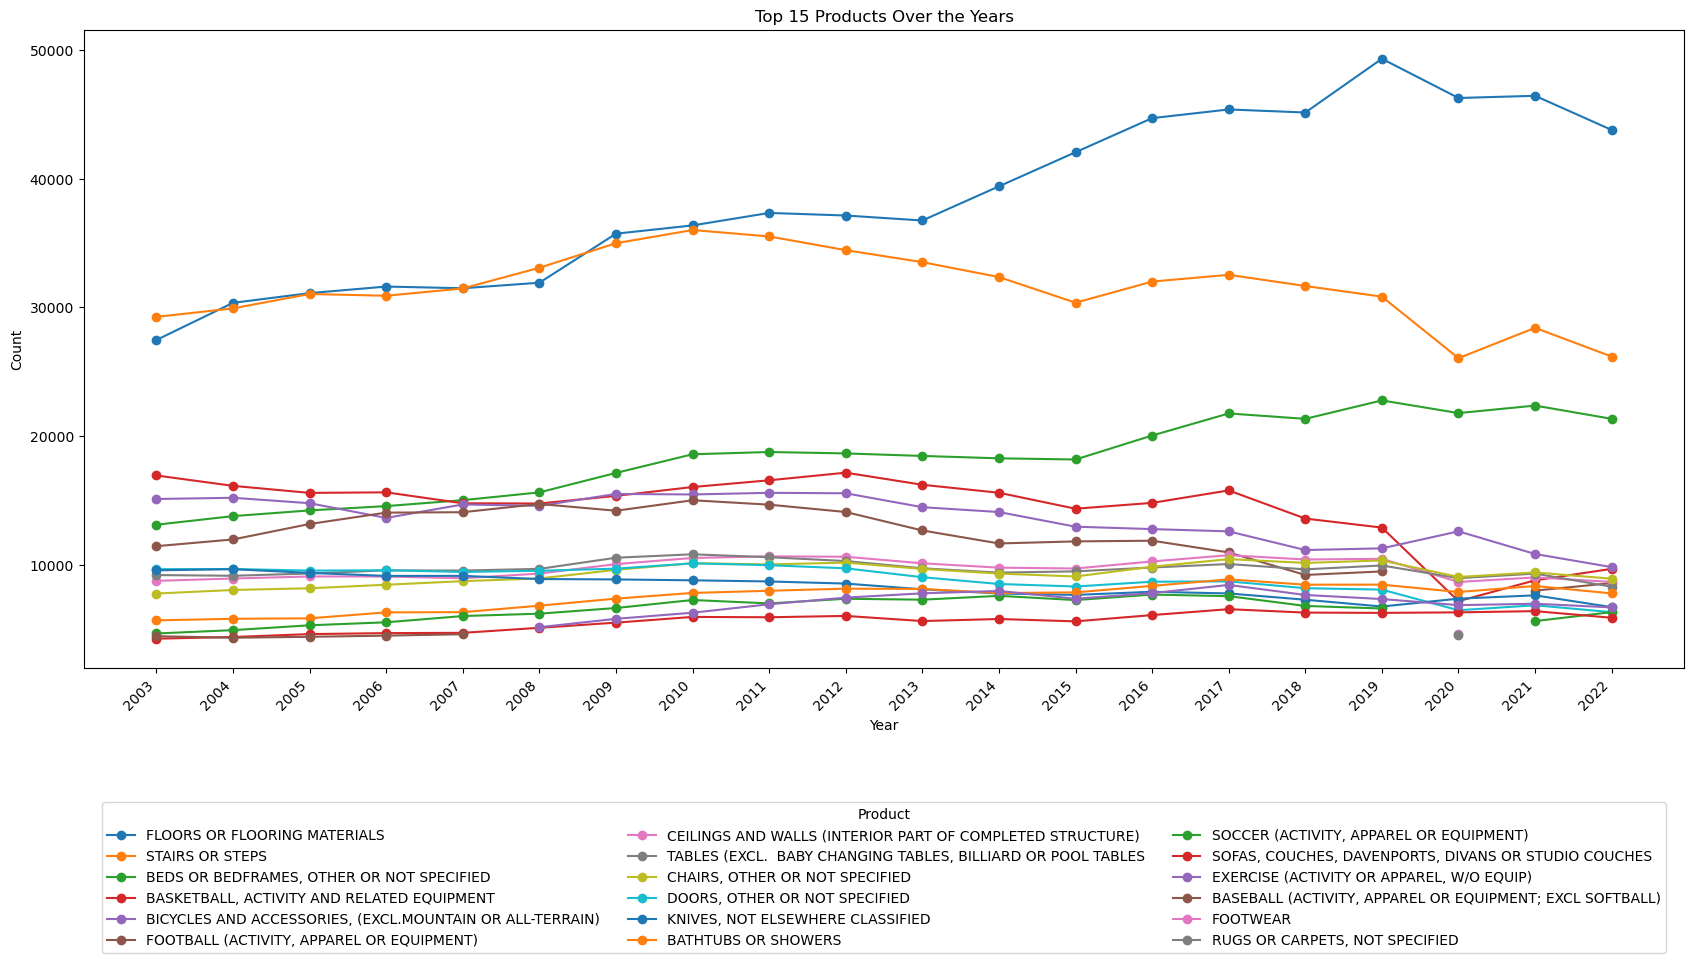

In [24]:
# Convert the 'year' column to integers
view['year'] = view['year'].astype(int)

# Pivot the data to have products as columns and years as rows
pivot_data = view.pivot(index='year', columns='PRODUCT', values='count')

# Calculate the total count for each product across all years
product_totals = pivot_data.sum().sort_values(ascending=False)

# Sort the pivot_data columns based on the product_totals order
pivot_data = pivot_data[product_totals.index]

# Plotting the line chart
fig, ax = plt.subplots(figsize=(18, 10))
pivot_data.plot(kind='line', ax=ax, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Top 15 Products Over the Years')

# Convert x-axis labels to integers and adjust rotation
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')

# Move the legend below the plot
ax.legend(title='Product', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.tight_layout()

plt.show()


Notes: <br>
- The number of injuries due to floors or flooring materials has increased dramatically over the past 20 years. 
- Basketball-related injuries have steadily decreased.
- Bed-related injuries have steadily increased.
- Stair related injuries have been decreasing since 2010.
- Bicycle-related injuries have slowly been decreasing since 2003.
- Sofa-related injuries have decreased since 2003, and decreased significantly in 2020.
<br><br>
A table comparing 2003 to 2022 values is below. Products that weren't in the top 15 for either of those years have been dropped.


In [30]:
subselection = view[view['year'].isin([2003, 2022])]

# Group by product and pivot the table to have years as columns
pivot_table = subselection.pivot_table(index='PRODUCT', columns='year', values='count', aggfunc='sum')

# Calculate the difference between 2022 and 2003
pivot_table['difference'] = pivot_table[2022] - pivot_table[2003]

# Calculate the quotient for 2022 over 2003
pivot_table['quotient'] = pivot_table[2022] / pivot_table[2003] -1

# Create the new DataFrame with the desired columns
new_df = pd.DataFrame({'2003': pivot_table[2003],'2022': pivot_table[2022], 'difference': pivot_table['difference'], '%change': pivot_table['quotient']})

# Drop rows with null values and order by 2022
new_df = new_df.dropna().sort_values(by='2022',ascending=False)

# Display the new DataFrame
new_df

,2003,2022,difference,%change
PRODUCT,,,,
FLOORS OR FLOORING MATERIALS,27460.0,43784.0,16324.0,0.594465
STAIRS OR STEPS,29254.0,26172.0,-3082.0,-0.105353
"BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED",13101.0,21332.0,8231.0,0.628273
"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)",15101.0,9807.0,-5294.0,-0.350573
"BASKETBALL, ACTIVITY AND RELATED EQUIPMENT",16928.0,9670.0,-7258.0,-0.428757
"CHAIRS, OTHER OR NOT SPECIFIED",7753.0,8906.0,1153.0,0.148717
CEILINGS AND WALLS (INTERIOR PART OF COMPLETED STRUCTURE),8739.0,8656.0,-83.0,-0.009498
"FOOTBALL (ACTIVITY, APPAREL OR EQUIPMENT)",11434.0,8565.0,-2869.0,-0.250918
"TABLES (EXCL. BABY CHANGING TABLES, BILLIARD OR POOL TABLES",9190.0,8282.0,-908.0,-0.098803


Notes:
<br>
- Bed injuries increased by 63%, the most of any product
- Floor injuries increased 59%, a close second to bed injuries
- Sport related injuries decreased with the exception of soccer. This suggests a significant decline in participation
- Knife injuries decreased. Perhaps less people are cooking.
- Sofa injuries increased 38%. This could be linked to bed injuries. Is it from people moving?

### What is the total number of injuries on record?

In [19]:
view = pd.read_sql(
'''

SELECT count(CPSC_Case_Number) as Total_Count
FROM all_neiss_x

'''
,neiss_conn
)
view

,Total_Count
0,7316561


### How is the total number of injuries changing over time?

In [14]:
view = pd.read_sql(
'''

SELECT year, count(CPSC_Case_Number) as count
FROM all_neiss_x
GROUP BY year

'''
,neiss_conn
)
view

,year,count
0,2003,347375
1,2004,353388
2,2005,360372
3,2006,363609
4,2007,369832
5,2008,374260
6,2009,391944
7,2010,405710
8,2011,396502
9,2012,394383


In [ ]:


# Pivot the data to have products as columns and years as rows
pivot_data = view.pivot(index='year', columns='PRODUCT', values='count')

# Calculate the total count for each product across all years
product_totals = pivot_data.sum().sort_values(ascending=False)

# Sort the pivot_data columns based on the product_totals order
pivot_data = pivot_data[product_totals.index]

# Plotting the line chart
fig, ax = plt.subplots(figsize=(18, 10))
pivot_data.plot(kind='line', ax=ax, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Top 15 Products Over the Years')

# Convert x-axis labels to integers and adjust rotation
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')

# Move the legend below the plot
ax.legend(title='Product', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.tight_layout()

plt.show()


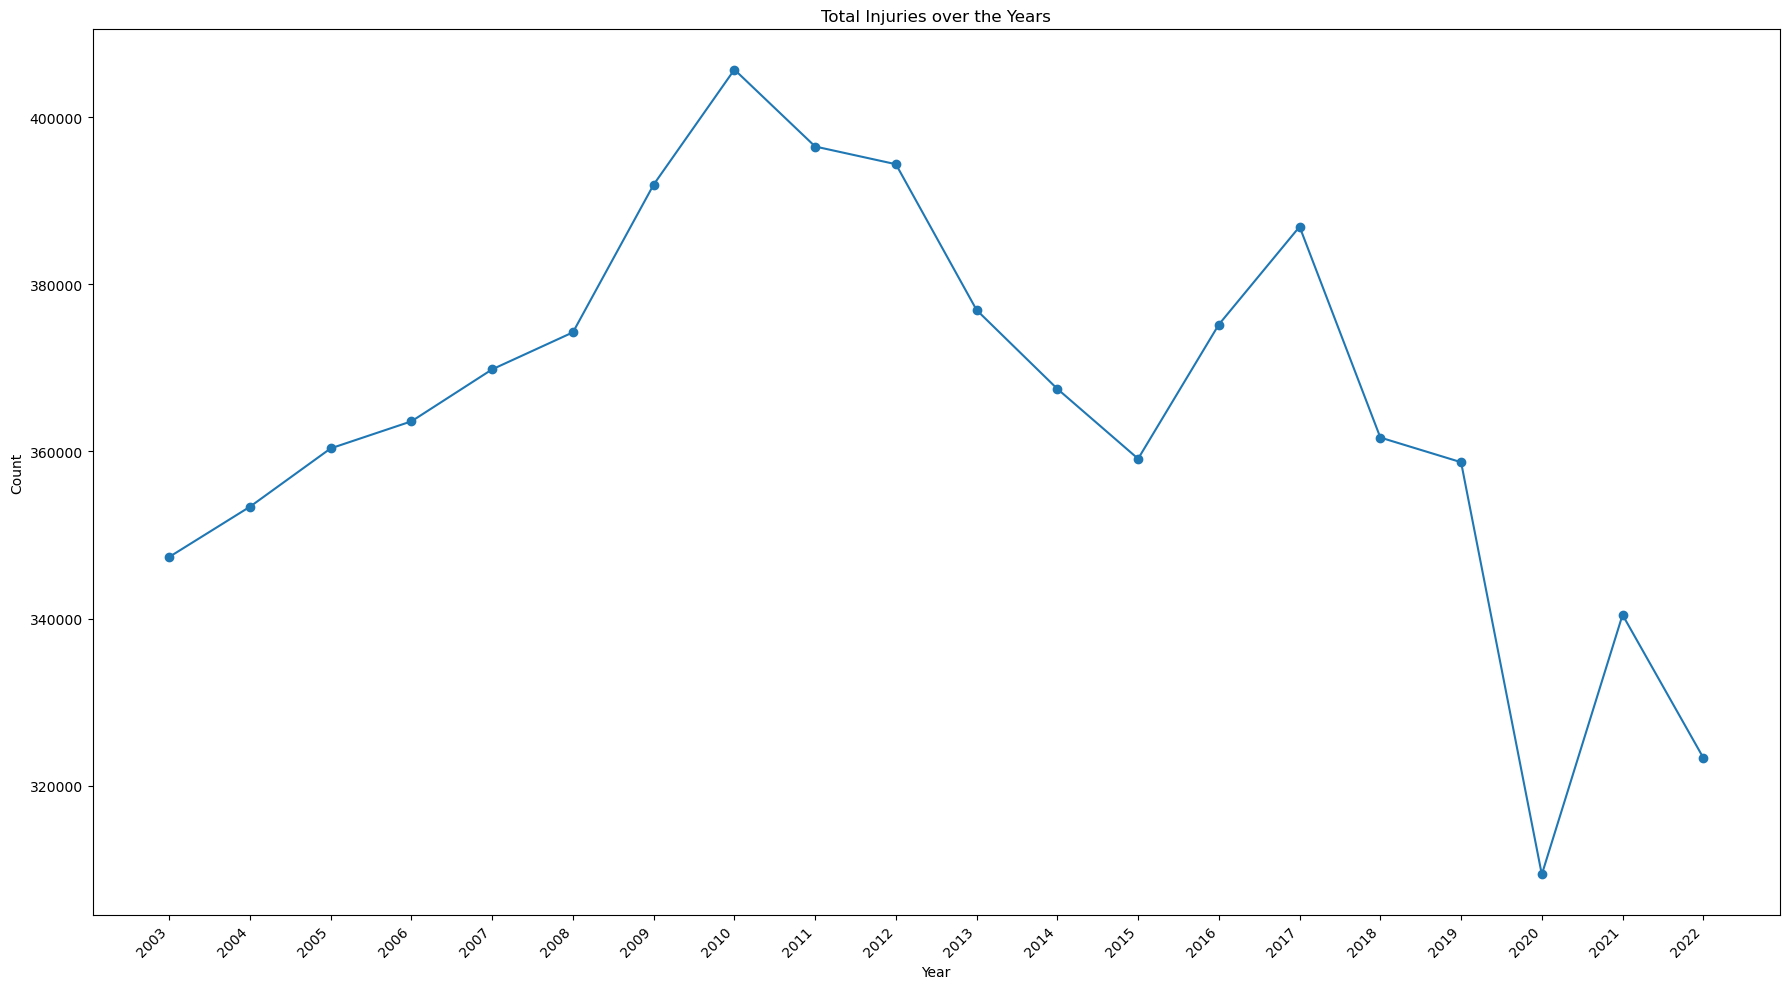

In [5]:
# Change from view to df to avoid confusion
df = view

# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))
df.sort_values('year')
df.plot(kind='line', ax=ax, marker='o', x='year',y='count', legend=False)

# Set the axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Total Injuries over the Years')

# Set the tick marks to avoid decimal numbers, set the rotation, and align the text
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')


plt.tight_layout()

plt.show()

Notes:
<br>
- The number of injuries has been on the decline since it's peak of 405,710 in 2010.
- Overall, there has been a decrease of 24,032 since 2003, and 82,367 since 2010.
- There was a significant drop in 2020, around the time of the Covid pandemic.

In [25]:
view[(view['year']==2022)].values - view[(view['year']==2010)].values

array([[    12, -82367]])

### Which products have caused the most fatalities?

In [52]:
view = pd.read_sql(
'''

SELECT PRODUCT, DISP, count(CPSC_Case_Number) count
FROM neiss_all AS nall
LEFT JOIN DispositionDim AS ddim on ddim.Code = nall.Disposition
LEFT JOIN ProductDim AS pdim on pdim.Code = nall.Product_All
WHERE Disposition = 8
GROUP BY PRODUCT
ORDER BY count DESC
LIMIT 10

'''
, neiss_conn)
view

,PRODUCT,DISP,count
0,FLOORS OR FLOORING MATERIALS,"8 - FATALITY INCL. DOA, DIED IN ER",778
1,"BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED","8 - FATALITY INCL. DOA, DIED IN ER",400
2,STAIRS OR STEPS,"8 - FATALITY INCL. DOA, DIED IN ER",325
3,GENERAL HOME OR ROOM INVOLVEMENT IN FIRES,"8 - FATALITY INCL. DOA, DIED IN ER",222
4,"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR AL...","8 - FATALITY INCL. DOA, DIED IN ER",217
5,BATHTUBS OR SHOWERS,"8 - FATALITY INCL. DOA, DIED IN ER",155
6,"SWIMMING POOLS, NOT SPECIFIED","8 - FATALITY INCL. DOA, DIED IN ER",153
7,"EXERCISE (ACTIVITY OR APPAREL, W/O EQUIP)","8 - FATALITY INCL. DOA, DIED IN ER",122
8,"SWIMMING (ACTIVITY, APPAREL OR EQUIPMENT)","8 - FATALITY INCL. DOA, DIED IN ER",95
9,"SOFAS, COUCHES, DAVENPORTS, DIVANS OR STUDIO C...","8 - FATALITY INCL. DOA, DIED IN ER",85


### How does total fatalities change over time?

In [57]:
view = pd.read_sql(
'''

SELECT year, count(CPSC_Case_Number) count
FROM neiss_all AS nall
LEFT JOIN DispositionDim AS ddim on ddim.Code = nall.Disposition
LEFT JOIN ProductDim AS pdim on pdim.Code = nall.Product_All
WHERE Disposition = 8
GROUP BY year
ORDER BY year, count DESC

'''
, neiss_conn)

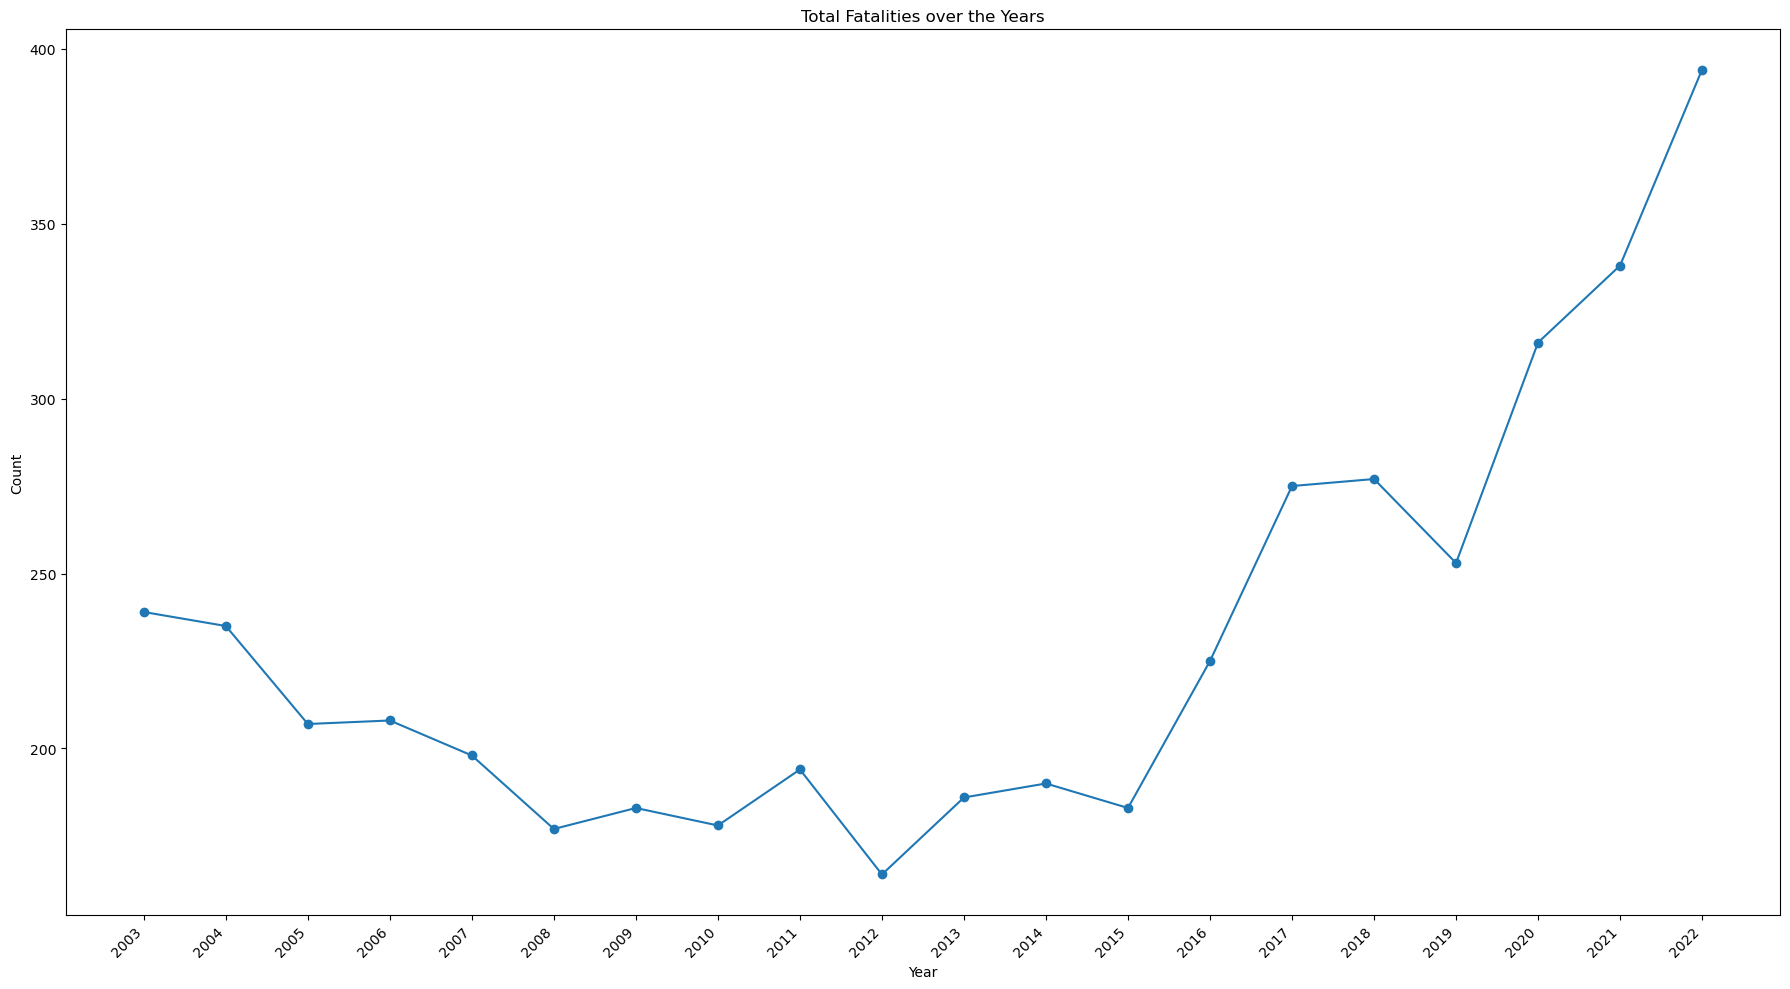

In [59]:
# Change from view to df to avoid confusion
df = view

# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))
df.sort_values('year')
df.plot(kind='line', ax=ax, marker='o', x='year',y='count', legend=False)

# Set the axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Total Fatalities over the Years')

# Set the tick marks to avoid decimal numbers, set the rotation, and align the text
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')


plt.tight_layout()

plt.show()

- While the number of injuries has decreased, the number of fatalities has increased, doubling from 2015 to 2022

### Top 10

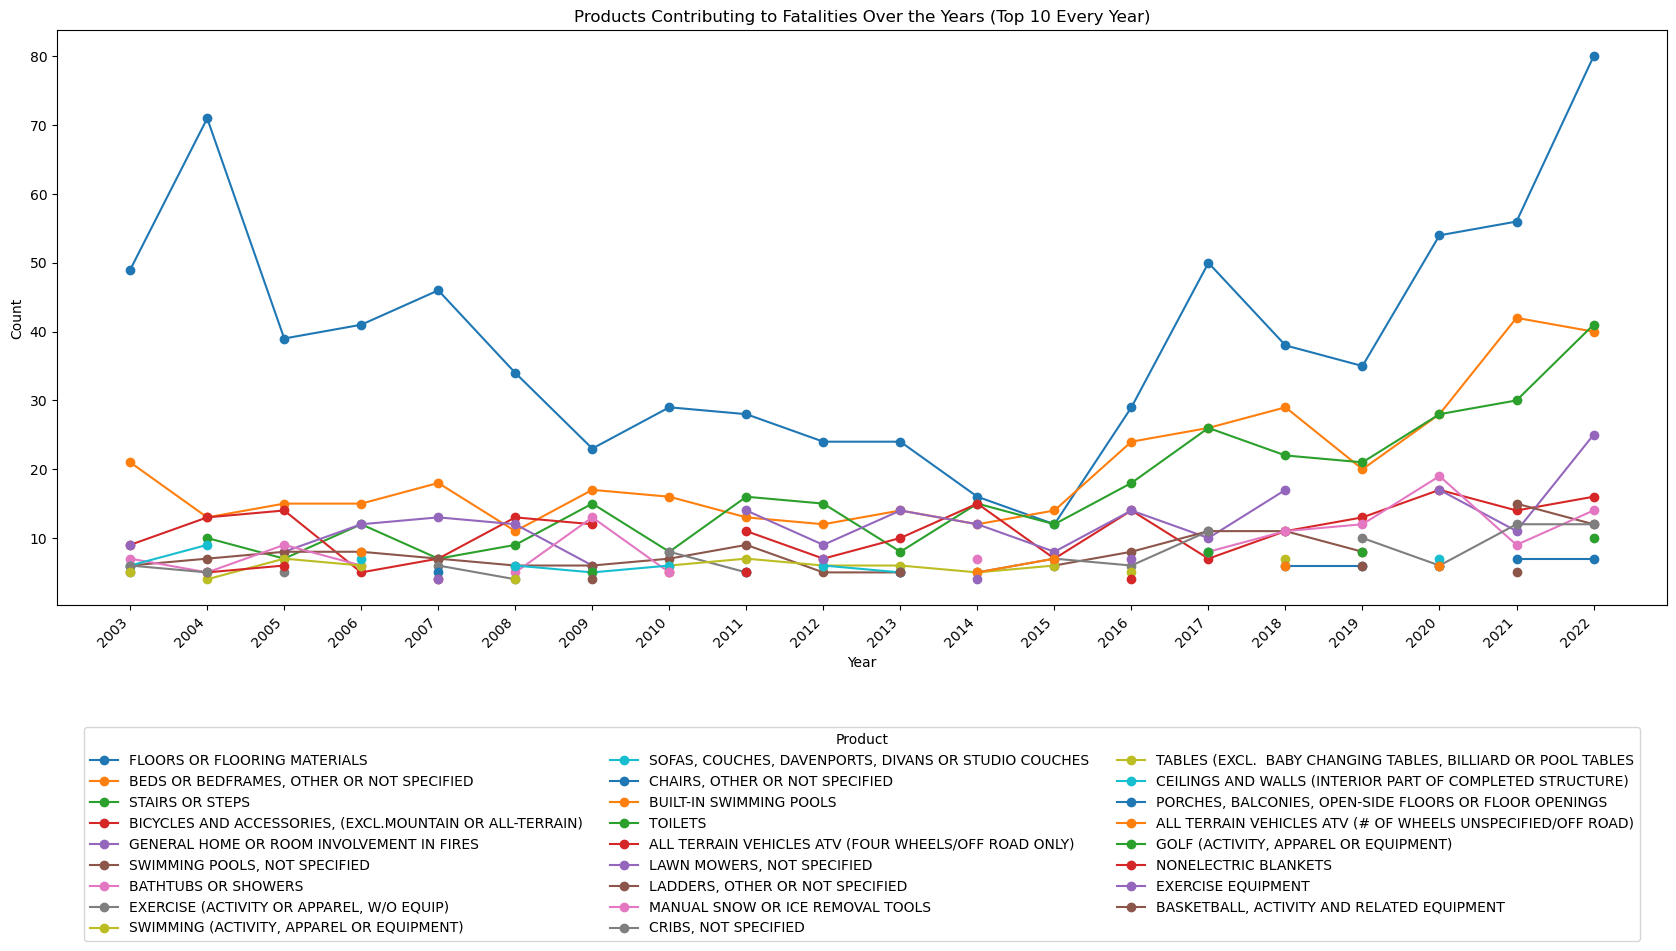

In [164]:
view = pd.read_sql(
'''

SELECT year, pdim.PRODUCT, count
FROM (
    SELECT year, Product_All, count(CPSC_Case_Number) as count, Disposition,
        ROW_NUMBER() OVER (PARTITION BY year ORDER BY count(CPSC_Case_Number) DESC) as rn
    FROM neiss_all
    WHERE Disposition = 8
    GROUP BY year, Product_All
    ) subquery
LEFT JOIN ProductDim AS pdim on pdim.Code = subquery.Product_All
WHERE rn <= 10
ORDER BY year, count DESC

'''
, neiss_conn)

# Convert the 'year' column to integers
view['year'] = view['year'].astype(int)

# Pivot the data to have products as columns and years as rows
pivot_data = view.pivot(index='year', columns='PRODUCT', values='count')

# Calculate the total count for each product across all years
product_totals = pivot_data.sum().sort_values(ascending=False)

# Sort the pivot_data columns based on the product_totals order
pivot_data = pivot_data[product_totals.index]

# Plotting the line chart
fig, ax = plt.subplots(figsize=(18, 10))
pivot_data.plot(kind='line', ax=ax, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Products Contributing to Fatalities Over the Years (Top 10 Every Year)')

# Convert x-axis labels to integers and adjust rotation
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')

# Move the legend below the plot
ax.legend(title='Product', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.tight_layout()

plt.show()

### Which products are contributing most to the increase in fatalities?

In [275]:
view = pd.read_sql(
'''

SELECT year, pdim.PRODUCT, count(CPSC_Case_Number) count, Disposition
FROM neiss_all
LEFT JOIN ProductDim AS pdim on pdim.Code = Product_All
WHERE year >= 2015 AND year <= 2022 AND Disposition = 8
GROUP BY Product_All, year
ORDER BY year, count DESC


'''
, neiss_conn)

This code below finds the difference between the 2015 and 2022 data and sorts according to the difference.

In [276]:
# Make a new dataframe that include just years 2022 and 2015
df = view[(view['year'] == 2022) | (view['year'] == 2015)]

# Pivot the table so that years 2015 and 2022 will become columns
pivot_table = df.pivot(index='PRODUCT', columns='year', values='count')
pivot_table.fillna(0,inplace=True)

# pivot_table.fillna(0, inplace=True)
pivot_table['difference'] = pivot_table[2022] - pivot_table[2015]
pivot_table = pivot_table.sort_values('difference',ascending=False)
top5 = pivot_table.nlargest(5,'difference')
top5

year,2015,2022,difference
PRODUCT,,,
FLOORS OR FLOORING MATERIALS,12.0,80.0,68.0
STAIRS OR STEPS,12.0,41.0,29.0
"BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED",14.0,40.0,26.0
GENERAL HOME OR ROOM INVOLVEMENT IN FIRES,8.0,25.0,17.0
"BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)",7.0,16.0,9.0


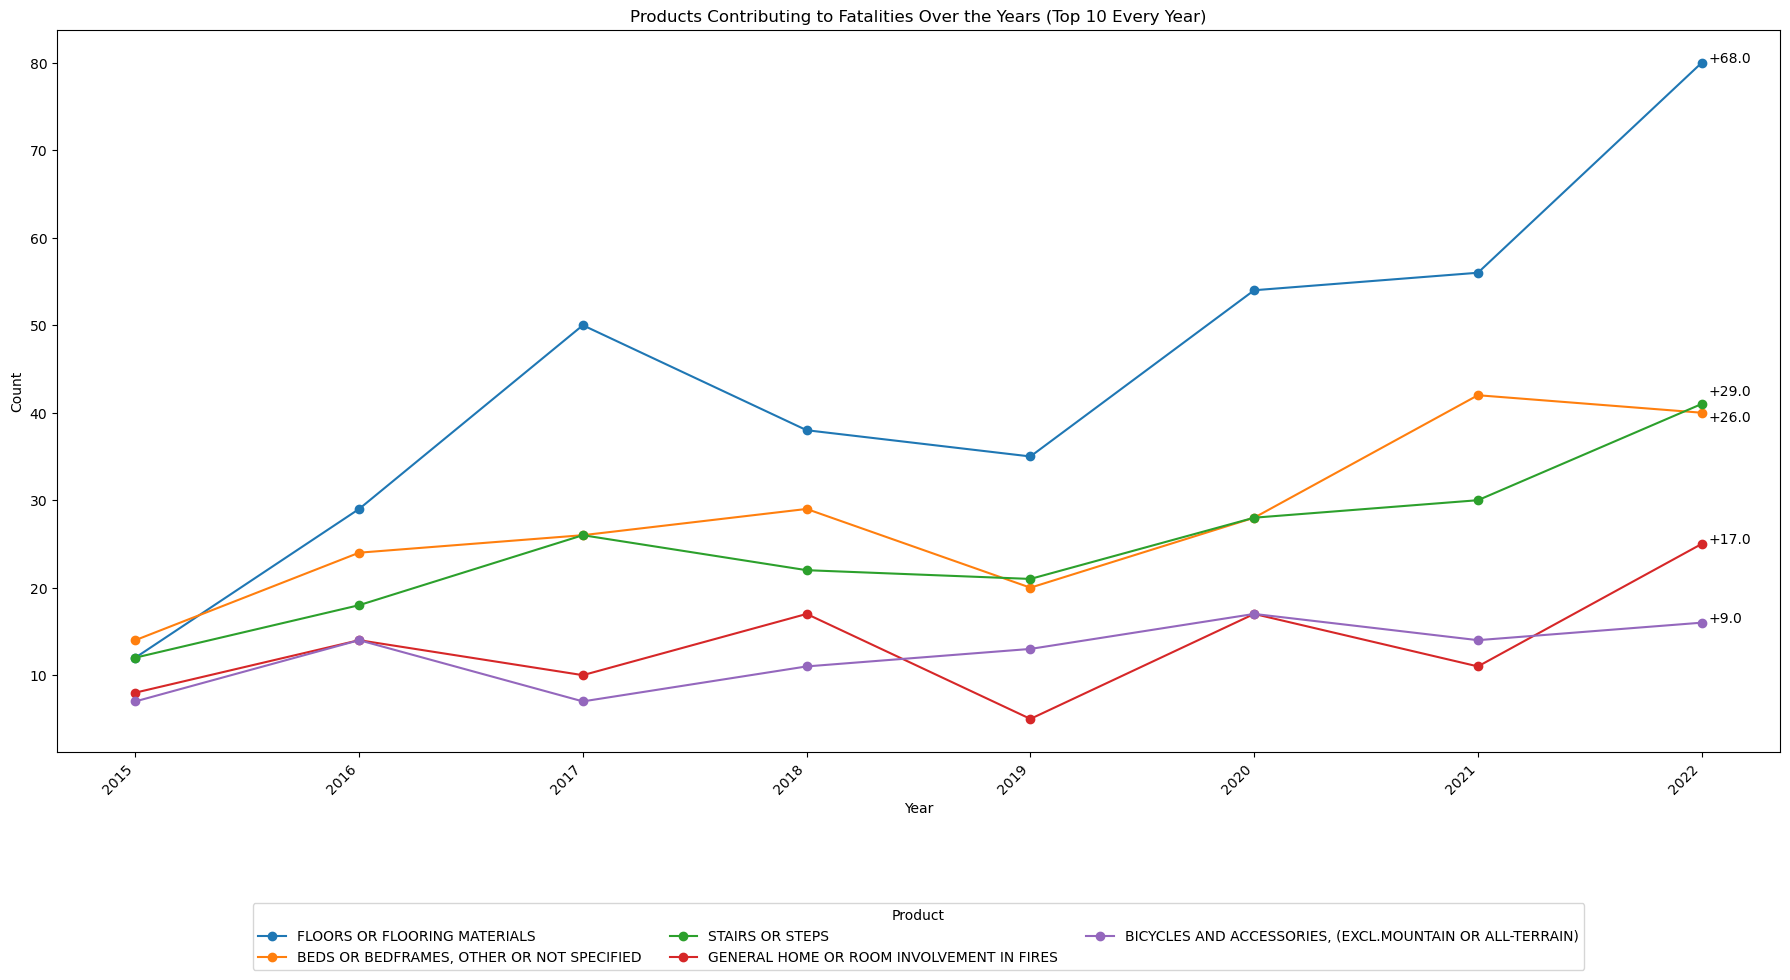

In [277]:
df = view
df = df[df['PRODUCT'].isin(top5.index)]

# Pivot the data to have products as columns and years as rows
pivot_data = df.pivot(index='year', columns='PRODUCT', values='count')

# Calculate the total count for each product across all years
product_totals = pivot_data.sum().sort_values(ascending=False)

# Sort the pivot_data columns based on the product_totals order
pivot_data = pivot_data[product_totals.index]

fig, ax = plt.subplots(figsize=(18, 10))
pivot_data.plot(kind='line', ax=ax, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Products Contributing to Fatalities Over the Years (Top 10 Every Year)')

# Convert x-axis labels to integers and adjust rotation
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')

# Move the legend below the plot
ax.legend(title='Product', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

difference_2022 = top10['difference'].tolist()

i = 0
# Annotate the data points in 2022 with the corresponding values
for product, difference_value in zip(pivot_data.columns, difference_2022):
    i += 1
    count_2022 = pivot_data.loc[2022, product]
    if i == 2: # adjust annotations 2 & 3 so they do not overlap
        count_2022 = count_2022 + 2
    if i == 3:
        count_2022 = count_2022 - 2
    ax.annotate("+" + f'{difference_value}', xy=(2022, count_2022), xytext=(5, 0), textcoords='offset points')


plt.tight_layout()
plt.show()

In [ ]:
print(df)
'''
print(df)
df = df.reindex(top10.index)
df'''

### Is there any trend for people leaving without being seen? 

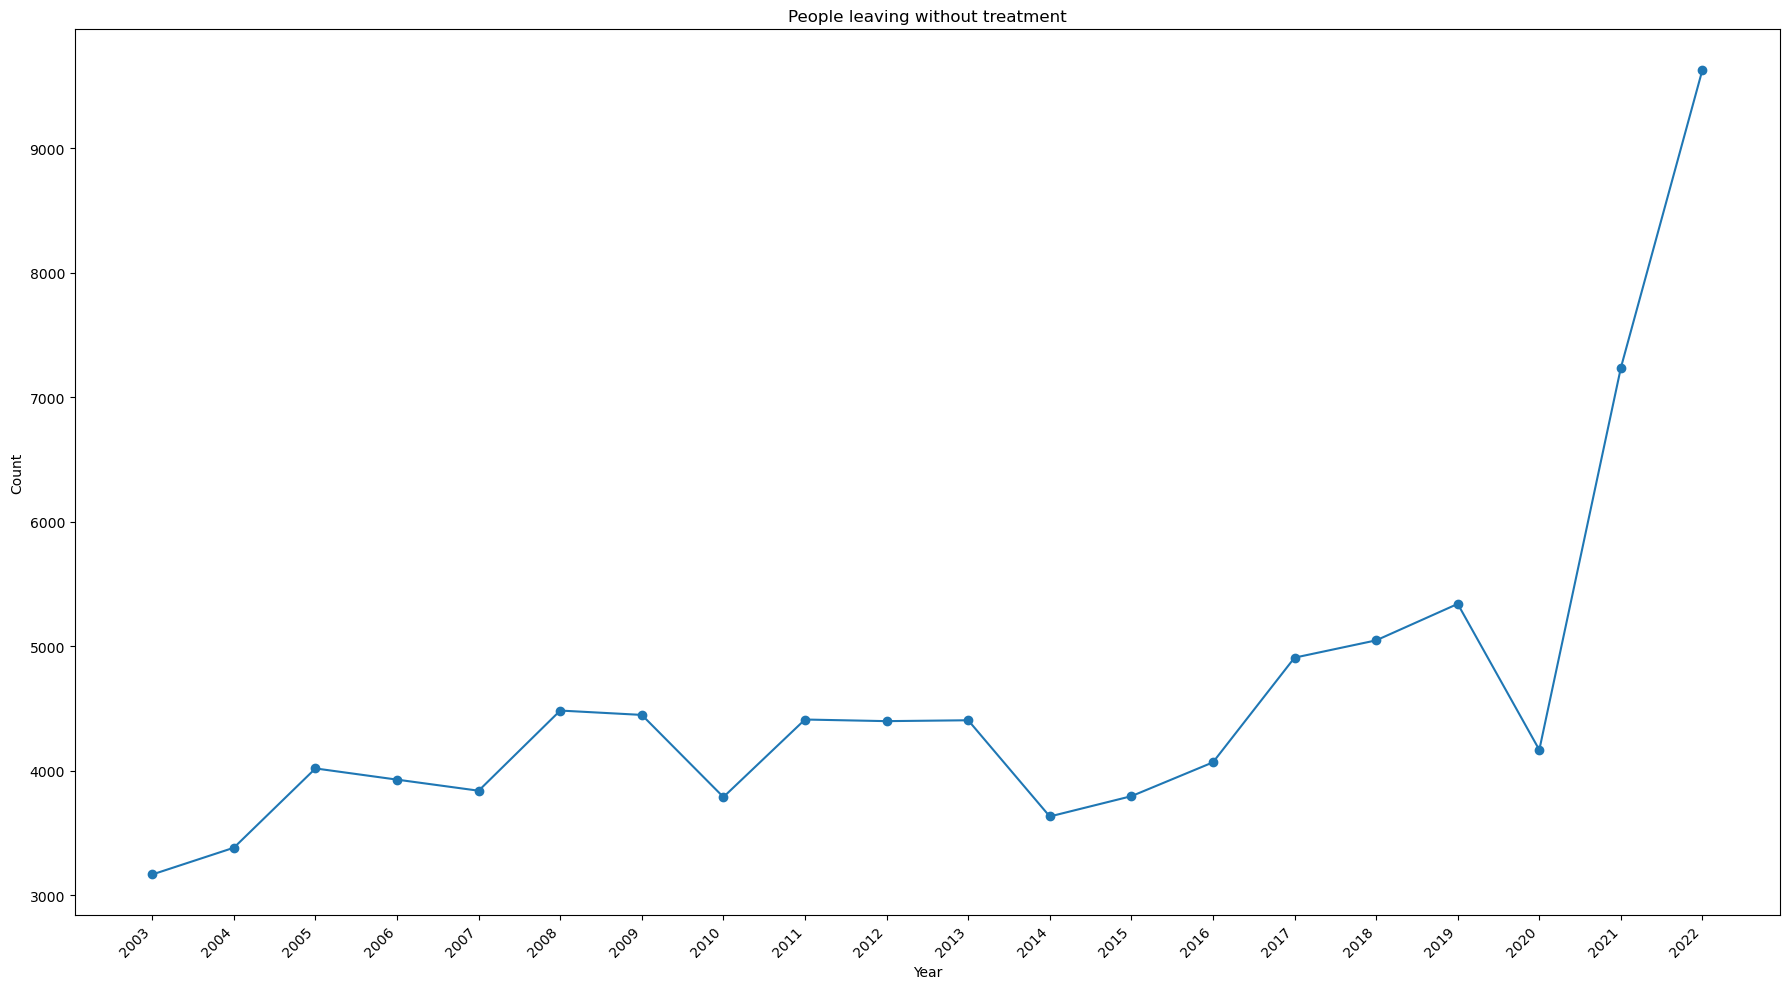

In [4]:
view = pd.read_sql(
'''

SELECT year, count(CPSC_Case_Number) count
FROM all_neiss_x AS nall
LEFT JOIN DispositionDim AS ddim on ddim.Code = nall.Disposition
LEFT JOIN ProductDim AS pdim on pdim.Code = nall.Product_All
WHERE Disposition = 6
GROUP BY year
ORDER BY year, count DESC

'''
, neiss_conn)
# Change from view to df to avoid confusion
df = view

# Create the plot
fig, ax = plt.subplots(figsize=(18, 10))
df.sort_values('year')
df.plot(kind='line', ax=ax, marker='o', x='year',y='count', legend=False)

# Set the axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('People leaving without treatment')

# Set the tick marks to avoid decimal numbers, set the rotation, and align the text
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')


plt.tight_layout()

plt.show()

Notes:
<br>
- The number of people leaving without being seen has spiked in 2021 and 2022.
- It nearly tripled from 2020 to 2022.

### Is there a seasonality to the number of injuries?

#### Monthly Seasonality

In [355]:
view = pd.read_sql(
'''


SELECT Treatment_Date, year, strftime('%m',Treatment_Date) as month, count(CPSC_Case_Number) as count
FROM all_neiss_x
GROUP BY year, month


''', neiss_conn)
view

,Treatment_Date,year,month,count
0,2003-01-01 00:00:00,2003,01,25383
1,2003-02-01 00:00:00,2003,02,22992
2,2003-03-01 00:00:00,2003,03,28719
3,2003-04-01 00:00:00,2003,04,29876
4,2003-05-01 00:00:00,2003,05,32039
...,...,...,...,...
235,2022-08-01 00:00:00,2022,08,29245
236,2022-09-01 00:00:00,2022,09,30385
237,2022-10-01 00:00:00,2022,10,28280
238,2022-11-01 00:00:00,2022,11,22242


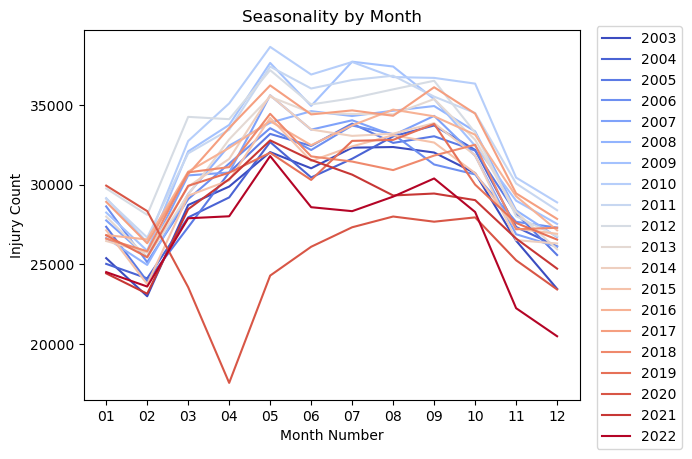

In [322]:
import matplotlib.pyplot as plt
import numpy as np

x = df['month']
y = df['count']
z = df['year']

# Creating a colormap based on the unique values in 'z'
cmap = plt.get_cmap('coolwarm', len(np.unique(z)))

# Plotting the line chart
for i, year in enumerate(np.unique(z)):
    indices = np.where(z == year)[0]
    plt.plot(x.iloc[indices], y.iloc[indices], c=cmap(i), label=str(year))

# Moving the legend outside the chart area
plt.legend(bbox_to_anchor=(1.02, 1.03), loc='upper left')

plt.title('Seasonality by Month')
plt.xlabel('Month Number')
plt.ylabel('Injury Count')

plt.show()

In [367]:
# Code to confirm that the drop off was in 2020
view[(view['year']==2020) & (view['month'] < '06')]

,Treatment_Date,year,month,count
204,2020-01-01 00:00:00,2020,01,29936
205,2020-02-01 00:00:00,2020,02,28336
206,2020-03-01 00:00:00,2020,03,23559
207,2020-04-01 00:00:00,2020,04,17554
208,2020-05-01 00:00:00,2020,05,24288


Notes:

- The data shows a definite seasonality over the year.
- There is an uptick in injuries over the summer months with a drop in the winter.
- February has the lowest number of injuries. It is also the shortest month of the year.
- There is a noticeable drop off in injuries in March and April of 2020. Covid 19 was declared a pandemic on March 11, 2020. 

In [350]:
view = pd.read_sql(
'''


SELECT year, Treatment_Date, strftime('%w', Treatment_Date) as day_of_week, count(CPSC_Case_Number) as count
FROM all_neiss_x
GROUP BY year, day_of_week


'''
,neiss_conn)
view

,year,Treatment_Date,day_of_week,count
0,2003,2003-01-05 00:00:00,0,54811
1,2003,2003-01-06 00:00:00,1,50722
2,2003,2003-01-07 00:00:00,2,48078
3,2003,2003-01-01 00:00:00,3,47544
4,2003,2003-01-02 00:00:00,4,46273
...,...,...,...,...
135,2022,2022-01-04 00:00:00,2,45332
136,2022,2022-01-05 00:00:00,3,45087
137,2022,2022-01-06 00:00:00,4,44417
138,2022,2022-01-07 00:00:00,5,44615


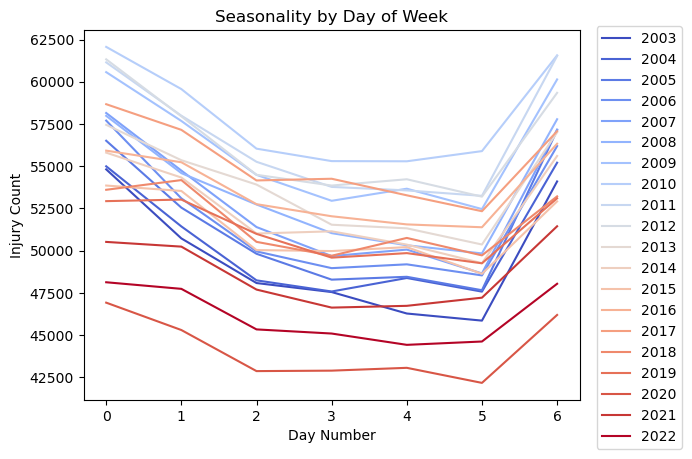

In [351]:
df = view

x = df['day_of_week']
y = df['count']
z = df['year']

# Creating a colormap based on the unique values in 'z'
cmap = plt.get_cmap('coolwarm', len(np.unique(z)))

# Plotting the line chart
for i, year in enumerate(np.unique(z)):
    indices = np.where(z == year)[0]
    plt.plot(x.iloc[indices], y.iloc[indices], c=cmap(i), label=str(year))

# Moving the legend outside the chart area
plt.legend(bbox_to_anchor=(1.02, 1.03), loc='upper left')

plt.title('Seasonality by Day of Week')
plt.xlabel('Day Number')
plt.ylabel('Injury Count')

plt.show()

Notes:
<br>
- Sunday is represented by 0, and Saturday is represented by 6.
- As expected, there are more injuries on weekend days.
- There are more injuries on Mondays, perhaps due to the many holidays happening on Mondays.
- Injuries drop off slightly as it gets to be later in the work week.

In [44]:
view = pd.read_sql(
'''


SELECT year, Treatment_Date, strftime('%d',Treatment_Date) as day_of_month, count(CPSC_Case_Number) as count
FROM all_neiss_x
GROUP BY year, day_of_month


'''
,neiss_conn)
view


,year,Treatment_Date,day_of_month,count
0,2003,2003-01-01 00:00:00,01,11733
1,2003,2003-01-02 00:00:00,02,11386
2,2003,2003-01-03 00:00:00,03,11346
3,2003,2003-01-04 00:00:00,04,11366
4,2003,2003-01-05 00:00:00,05,11397
...,...,...,...,...
615,2022,2022-01-27 00:00:00,27,10823
616,2022,2022-01-28 00:00:00,28,10322
617,2022,2022-01-29 00:00:00,29,9877
618,2022,2022-01-30 00:00:00,30,9929


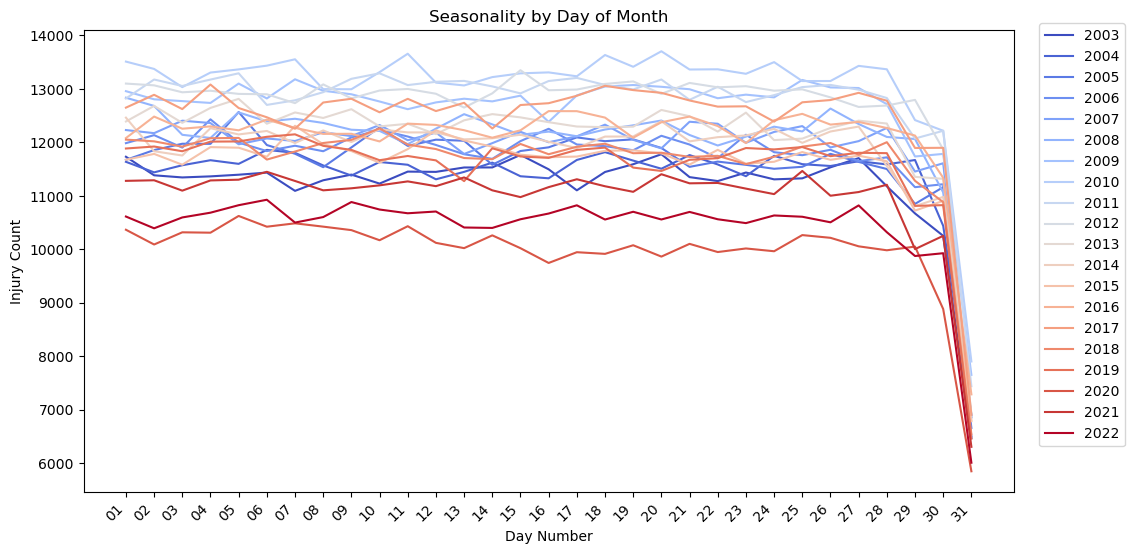

In [54]:
df = view

x = df['day_of_month']
y = df['count']
z = df['year']

# Creating a colormap based on the unique values in 'z'
cmap = plt.get_cmap('coolwarm', len(np.unique(z)))

# Adjust the figure size
plt.figure(figsize=(12,6))

# Plotting the line chart
for i, year in enumerate(np.unique(z)):
    indices = np.where(z == year)[0]
    plt.plot(x.iloc[indices], y.iloc[indices], c=cmap(i), label=str(year))

# Moving the legend outside the chart area
plt.legend(bbox_to_anchor=(1.02, 1.03), loc='upper left')

plt.title('Seasonality by Day of Month')
plt.xlabel('Day Number')
plt.ylabel('Injury Count')
plt.xticks(rotation=45,ha='right')


plt.show()

Notes:
<br>
- There is no apparent seasonality by day of month. The plot likely drops off at 30 and 31 because there are months with less than that number of days.

### What body parts are most frequenty affected in injuries?

#### Prepare data

In [7]:
# For this we have to create another table to expand the values of the two Body_Part columns. We'll create it as a view.

neiss_conn.execute(
'''

CREATE VIEW neiss_bdy AS
SELECT *
FROM 
    (SELECT all_neiss_x.*, Body_Part as Body_Part_All
    FROM all_neiss_x
    WHERE Body_Part IS NOT NULL
    UNION ALL
    SELECT all_neiss_x.*, Body_Part_2 as Body_Part_All
    FROM all_neiss_x
    WHERE Body_Part_2 IS NOT NULL
    ) as subquery


'''
)

In [6]:
neiss_conn.execute(
'''

DROP VIEW neiss_bdy


'''
)

OperationalError: no such view: neiss_bdy

In [8]:
# Confirm the data  was loaded

view = pd.read_sql(
'''

SELECT *
FROM neiss_bdy
ORDER BY Body_Part_All, Product_All

'''
,neiss_conn
)

view

,index,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,...,Product_3,Narrative,Stratum,PSU,Weight,Other_Diagnosis,Other_Diagnosis_2,year,Product_All,Body_Part_All
0,203,90103802,2009-01-01 00:00:00,213,1,0,None,NaN,0,41,...,0,DX VOMITING: MOP CONCERNED THAT PT MAY HAVE IN...,V,67,15.3491,None,None,2009,None,0.0
1,249,90104346,2009-01-02 00:00:00,211,2,1,None,NaN,0,41,...,0,POSSIBLY SWALLOWED PHOTOCELL BATTERY;DX INGEST...,C,20,6.0260,None,None,2009,None,0.0
2,410,90105703,2009-01-03 00:00:00,28,1,1,None,NaN,0,41,...,0,PHARNYX FB-PIECE OF TOOTHPICK CAUGHT IN PHARNY...,V,53,15.3491,None,None,2009,None,0.0
3,1015,90109653,2009-01-03 00:00:00,2,1,0,None,NaN,0,41,...,0,FATHER STS PT OPEN THE BACK OF A DVD REMOTE CO...,L,50,62.0610,None,None,2009,None,0.0
4,1106,90109819,2009-01-02 00:00:00,8,1,1,None,NaN,0,41,...,0,PT.AT HOME PLAYING & SWALLOWED 2 MAGNETS FROM ...,S,28,70.8387,None,None,2009,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596857,356194,200230125,2019-12-18 00:00:00,6,2,0,None,1.0,75,62,...,0,6YOF P/W RINGING OF EAR AND PAIN 2/2 HAVING A ...,V,57,17.3778,None,RINGING/PAIN,2019,None,94.0
7596858,357089,200245256,2019-09-22 00:00:00,8,1,1,None,1.0,87,53,...,0,8 YOM WAS RUNNING AND FELL. MULTIPLE ABRASIONS...,C,10,4.8283,None,None,2019,None,94.0
7596859,357373,200250688,2019-08-28 00:00:00,15,2,1,None,1.0,92,57,...,0,"15YOF WITH RT EAR PAIN, HAS BEEN SWIMMING A LO...",C,10,4.8283,None,SWIMMERS EAR,2019,None,94.0
7596860,357523,200253150,2019-11-16 00:00:00,27,1,2,None,2.0,30,57,...,0,27YOM FELL WHILE HAVING SEIZURE AND HIT HEAD O...,V,64,16.4632,None,None,2019,None,94.0


In [9]:
# Here is a count of the two old Body_Part Columns for comparison to the row count of the new table
# A subquery is used because the same select statement cannot reference alias columns that were created within it

view = pd.read_sql(
'''

SELECT B1, B2, B1 + B2 AS "ALL"
FROM (
    SELECT COUNT(Body_Part) AS B1, COUNT(Body_Part_2) AS B2
    FROM all_neiss_x
) AS subquery;


'''
,neiss_conn
)

view

,B1,B2,ALL
0,7316561,280301,7596862


Pivoting the columns was successful.

###

In [10]:
view = pd.read_sql(
'''

SELECT BDYPT, count(CPSC_Case_Number) AS count
FROM neiss_bdy
LEFT JOIN BdypartDim bdy ON Code = Body_Part_All
GROUP BY BDYPT
ORDER BY count DESC

'''
,neiss_conn)
view

,BDYPT,count
0,75 - HEAD,1161983
1,76 - FACE,708821
2,92 - FINGER,672443
3,79 - LOWER TRUNK,634206
4,37 - ANKLE,436942
5,35 - KNEE,385366
6,31 - UPPER TRUNK,376232
7,82 - HAND,373804
8,83 - FOOT,336107
9,30 - SHOULDER,300621


Text(0, 0.5, 'Cases in Millions')

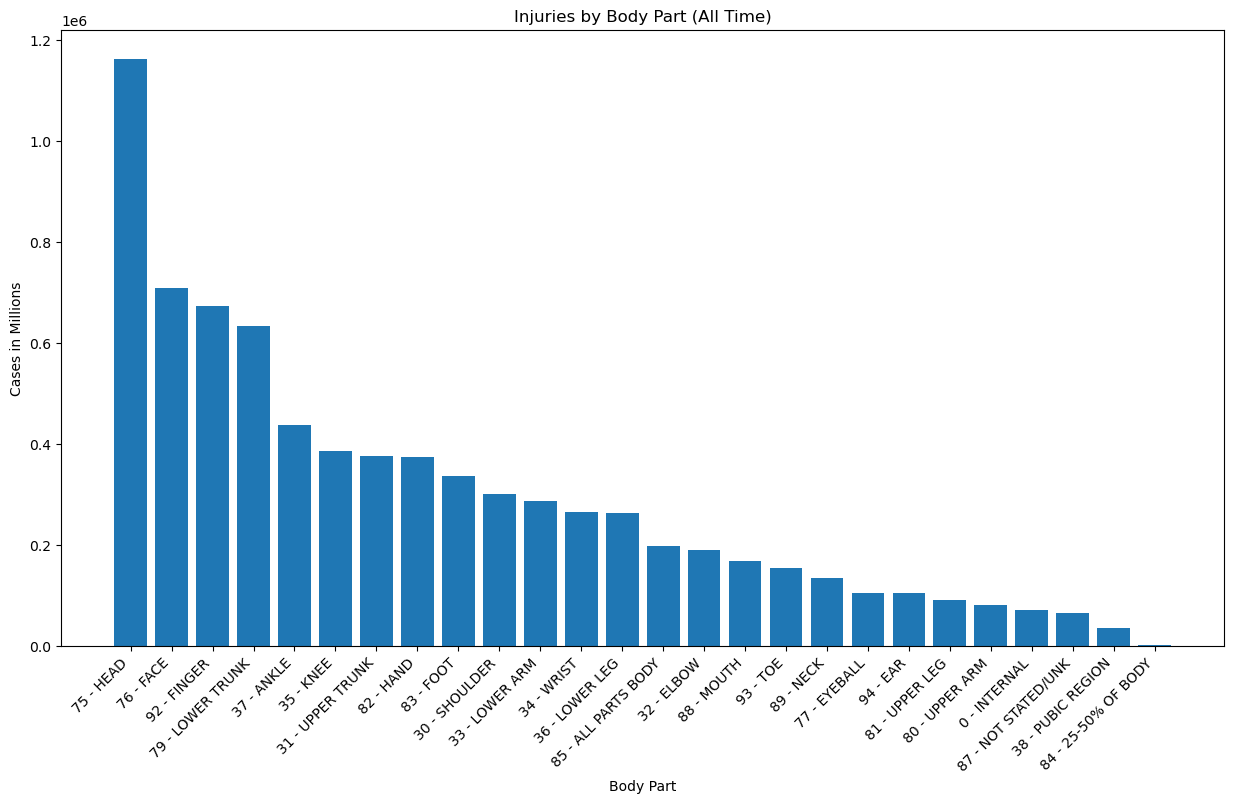

In [11]:
x = view['BDYPT']
y = view['count']

plt.figure(figsize=(15,8))
plt.bar(x,y)
plt.xticks(rotation=45, ha='right')
plt.title('Injuries by Body Part (All Time)')
plt.xlabel('Body Part')
plt.ylabel('Cases in Millions')

In [17]:
view[view['BDYPT'].str.contains('25-50')]

,BDYPT,count
25,84 - 25-50% OF BODY,1421


Notes:
- Most injuries are head injuries by a wide margin. Occurences were about 70% higher than the next category down. 
- Face, finger, and lower trunk injuries also made a significant portion that stood in a group of their own, about 40% above the next stage, which begins with ankle injuries at ~400k.
- Injuries that damaged 25-50% of the body were lowest, with only 1421 cases.
- It makes good sense that people would go to the hospital the most over head injuries, as they can be serious if not checked out.
- It also makes sense that finger injuries would be in the top range because they are perhaps the most prone to injury in routine activities that most people perform, such as cooking.
- Face injuries could be in the top range because people are concerned about lasting changes to their appearance, or perhaps because those injuries are particularly disturbing.

#### Over Time

In [18]:
# Here is a count of the two old Body_Part Columns for comparison to the row count of the new table
# A subquery is used because the same select statement cannot reference alias columns that were created within it

view = pd.read_sql(
'''

SELECT year, BDYPT, count, rn
FROM
    (SELECT year, Body_Part_All, count(CPSC_Case_Number) as count,
        ROW_NUMBER() OVER (PARTITION BY year ORDER BY count(CPSC_Case_Number) DESC) as rn
    FROM neiss_bdy
    GROUP BY year, Body_Part_All
) subquery
LEFT JOIN BdypartDim as bdy ON bdy.Code = subquery.Body_Part_All
ORDER BY year, count DESC

'''
,neiss_conn
)

view

,year,BDYPT,count,rn
0,2003,75 - HEAD,40179,1
1,2003,92 - FINGER,38328,2
2,2003,76 - FACE,34491,3
3,2003,79 - LOWER TRUNK,28871,4
4,2003,37 - ANKLE,22938,5
...,...,...,...,...
515,2022,77 - EYEBALL,4960,22
516,2022,80 - UPPER ARM,4439,23
517,2022,0 - INTERNAL,4306,24
518,2022,38 - PUBIC REGION,2160,25


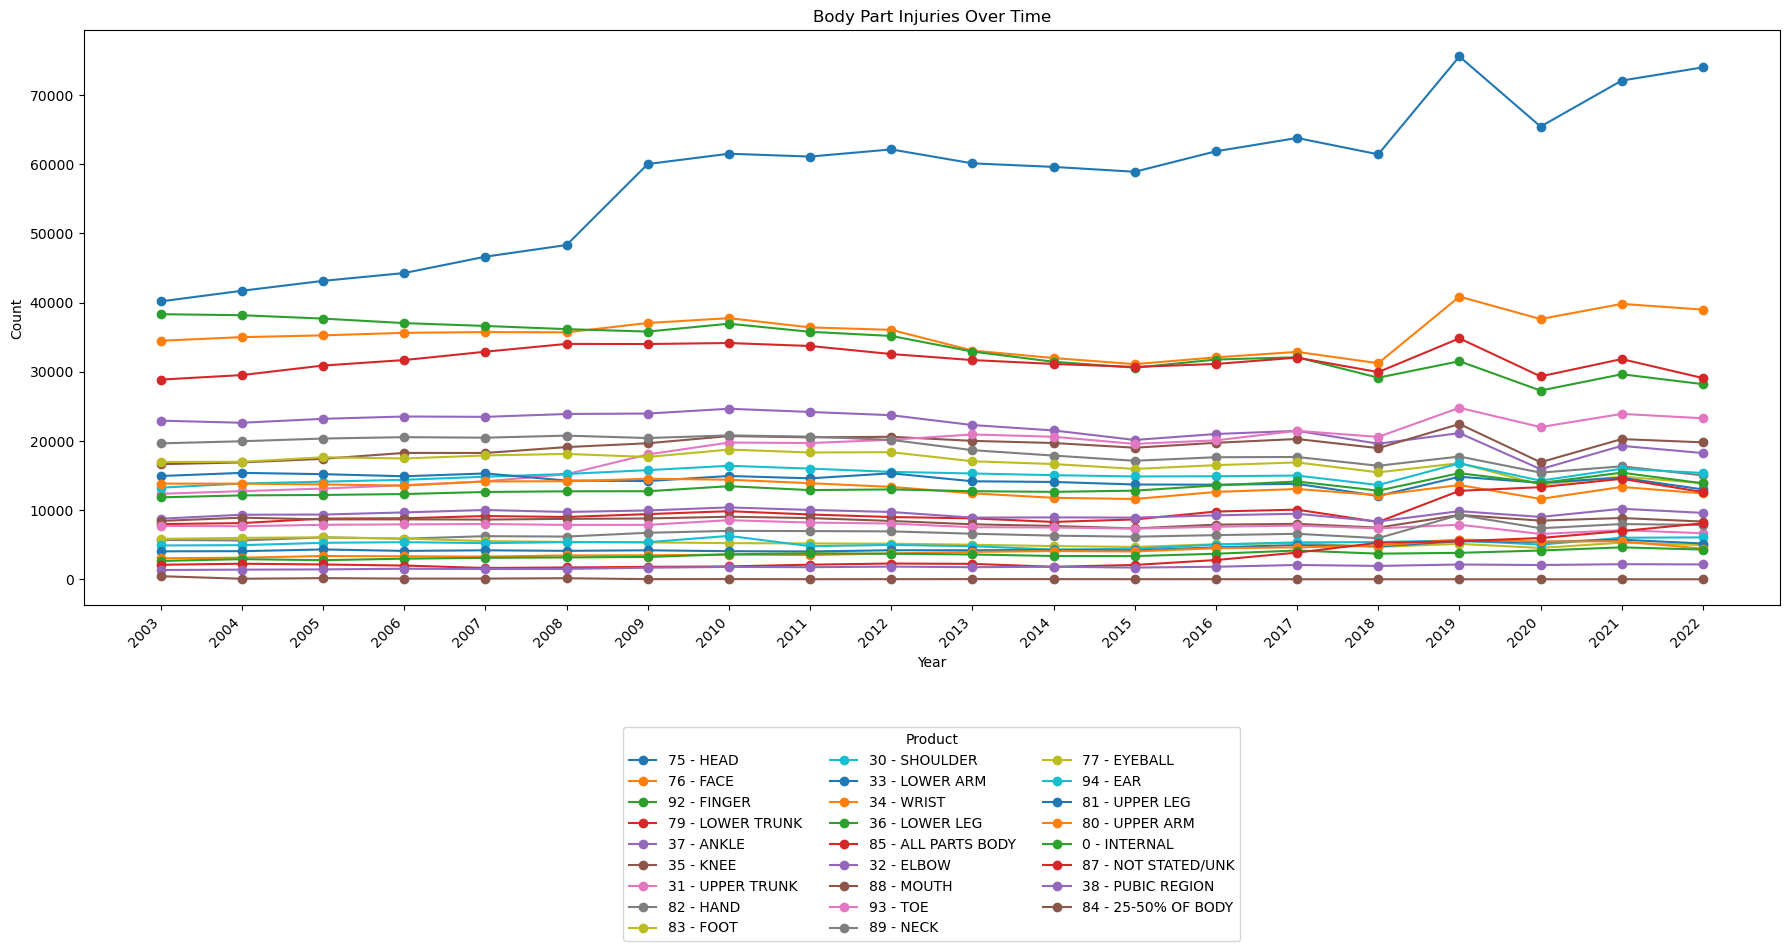

In [19]:
# Pivot the data to have products as columns and years as rows
pivot_data = view.pivot(index='year', columns='BDYPT', values='count')

# Calculate the total count for each product across all years
product_totals = pivot_data.sum().sort_values(ascending=False)

# Sort the pivot_data columns based on the product_totals order
pivot_data = pivot_data[product_totals.index]

# Plotting the line chart
fig, ax = plt.subplots(figsize=(18, 10))
pivot_data.plot(kind='line', ax=ax, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Body Part Injuries Over Time')

# Convert x-axis labels to integers and adjust rotation
ax.set_xticks(view['year'].unique())
ax.set_xticklabels(view['year'].unique(), rotation=45, ha='right')

# Move the legend below the plot
ax.legend(title='Product', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.tight_layout()

plt.show()

Notes:
- Head injuries have been steadily increasing since the data first became available.
- Generally, most injury types are flat.
- There has been a noticeable uptick in head, face, and 'all parts body' injuries since 2019. 

### Which bodypart injuries are associated with the most fatalities?

In [20]:
view = pd.read_sql(
'''

SELECT BDYPT, Disposition, count(CPSC_Case_Number) AS count
FROM neiss_bdy
LEFT JOIN BdypartDim bdy ON bdy.Code = Body_Part_All
WHERE Disposition = 8
GROUP BY BDYPT
ORDER BY count DESC
LIMIT 15

'''
,neiss_conn)
view

,BDYPT,Disposition,count
0,85 - ALL PARTS BODY,8,2539
1,75 - HEAD,8,900
2,31 - UPPER TRUNK,8,343
3,87 - NOT STATED/UNK,8,235
4,76 - FACE,8,125
5,79 - LOWER TRUNK,8,75
6,89 - NECK,8,67
7,81 - UPPER LEG,8,23
8,36 - LOWER LEG,8,21
9,33 - LOWER ARM,8,16


Text(0, 0.5, 'Cases')

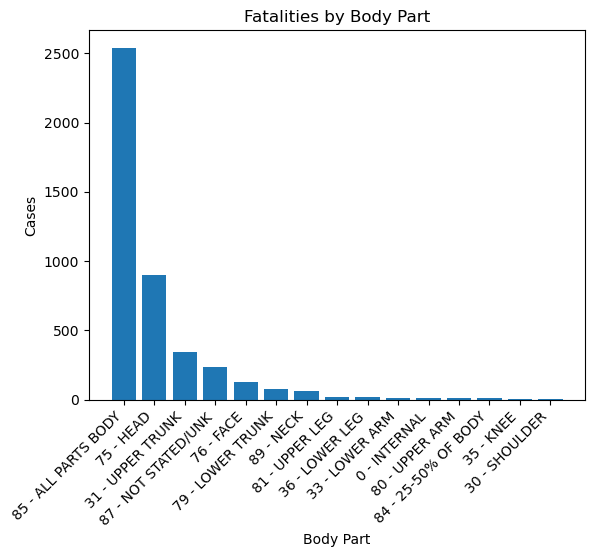

In [21]:
x = view['BDYPT']
y = view['count']

plt.bar(x,y)
plt.xticks(rotation=45, ha='right')
plt.title('Fatalities by Body Part')
plt.xlabel('Body Part')
plt.ylabel('Cases')

Notes:
- Injuries that involved all parts of the body had by far the most fatalities at 2500. Could this be due to fire or explosions?
- Head injuries were second at ~900

### In how many cases did injuries involving all parts of the body involve fire?

In [80]:
view = pd.read_sql(
'''

SELECT BDYPT, DISP, count(CPSC_Case_Number) AS count, FIRE
FROM neiss_bdy
LEFT JOIN BdypartDim bdy ON bdy.Code = Body_Part_All
LEFT JOIN DispositionDim dis ON dis.Code = Disposition
LEFT JOIN FireDim as fire ON fire.Code = Fire_Involvement
WHERE Disposition = 8 AND BDYPT LIKE "%ALL PARTS%"
GROUP BY Fire_Involvement


'''
,neiss_conn)
view

,BDYPT,DISP,count,FIRE
0,85 - ALL PARTS BODY,"8 - FATALITY INCL. DOA, DIED IN ER",2315,NO/?
1,85 - ALL PARTS BODY,"8 - FATALITY INCL. DOA, DIED IN ER",197,FD
2,85 - ALL PARTS BODY,"8 - FATALITY INCL. DOA, DIED IN ER",2,NO FD
3,85 - ALL PARTS BODY,"8 - FATALITY INCL. DOA, DIED IN ER",25,? FD


Notes:
- Fire was involved in 197 of ALL PARTS BODY fatalities.
- Alcohol and Drugs were also not recorded as being involved.
- Note that according to the source data, it is possible that alcohol and drug involvement was not included until 2019

### What was the percentage of injuries that involved alcohol or drugs?

In [127]:
view = pd.read_sql(
'''

SELECT count, Fire_Involvement, Alcohol, Drug, (CAST(count AS FLOAT) * 100 / total_count) as percentage
FROM
    (SELECT count(CPSC_Case_Number) AS count, Fire_Involvement, Alcohol, Drug
    FROM all_neiss_x
    WHERE Alcohol IS NOT NULL AND DRUG IS NOT NULL
    GROUP BY  Alcohol, Drug) subquery,
    (SELECT COUNT(*) AS total_count FROM all_neiss_x WHERE Alcohol IS NOT NULL AND DRUG IS NOT NULL) total_rows


'''
,neiss_conn)
view

,count,Fire_Involvement,Alcohol,Drug,percentage
0,1281432,0,0.0,0.0,96.212994
1,24799,0,0.0,1.0,1.861969
2,23317,0,1.0,0.0,1.750696
3,2322,0,1.0,1.0,0.174341


In [75]:
view = pd.read_sql(
'''

SELECT *
FROM FireDim

'''
, neiss_conn)
view

,Code,FIRE
0,0,NO/?
1,1,FD
2,2,NO FD
3,3,? FD
4,4,MV


- Less than 4% of injuries involved alcohol or drugs
- The data in this case is truncated to not include the null values because recording of this data did not begin until 2019.

### What age group is most suceptible to injury?

In [183]:
AgeCount = pd.read_sql(
'''

SELECT CASE
    WHEN Age = 0 THEN NULL
    WHEN Age BETWEEN 200 AND 211 THEN 0
    WHEN Age BETWEEN 212 AND 223 THEN 1
    ELSE Age
    END AS AgeInc,
Age, count(CPSC_Case_Number) as count
FROM all_neiss_x
GROUP BY Age
ORDER BY Age Asc



'''
,neiss_conn)
AgeCount

,AgeInc,Age,count
0,NaN,0,513
1,2.0,2,265645
2,3.0,3,217219
3,4.0,4,182621
4,5.0,5,164676
...,...,...,...
131,1.0,219,24544
132,1.0,220,24703
133,1.0,221,24266
134,1.0,222,24001


In [199]:
View = pd.read_sql(
'''

SELECT Age,CASE
    WHEN Age = 0 THEN NULL
    WHEN Age BETWEEN 200 AND 211 THEN 0
    WHEN Age BETWEEN 212 AND 223 THEN 1
    ELSE Age
    END AS AgeInc
FROM all_neiss_x
ORDER BY AgeInc



'''
,neiss_conn)
View

,Age,AgeInc
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
7316556,112,112.0
7316557,112,112.0
7316558,113,113.0
7316559,113,113.0


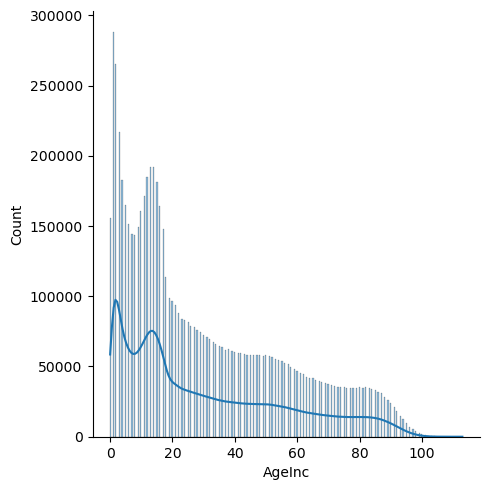

In [198]:
g = sns.displot(View['AgeInc'], kde=True)

Notes:
- Younger age groups are significantly more susceptible to injury
- There is a dip that occurs around the age of 5-9. Injuries peak at about 192k at the age of 13, stay about there for the age of 14, and then steadily decrease from there.
- Injuries pick up a bit in the early 50s, and again in the 80s.

### What is the distribution for children under two years?

In [205]:
view = pd.read_sql(
'''

SELECT Age, CASE 
    WHEN AGE BETWEEN 201 AND 223 THEN AGE - 200
    ELSE AGE = NULL
    END AS age_months
FROM all_neiss_x
WHERE age_months IS NOT NULL
ORDER BY age_months

'''
,neiss_conn)
view

,Age,age_months
0,201,1
1,201,1
2,201,1
3,201,1
4,201,1
...,...,...
443944,223,23
443945,223,23
443946,223,23
443947,223,23


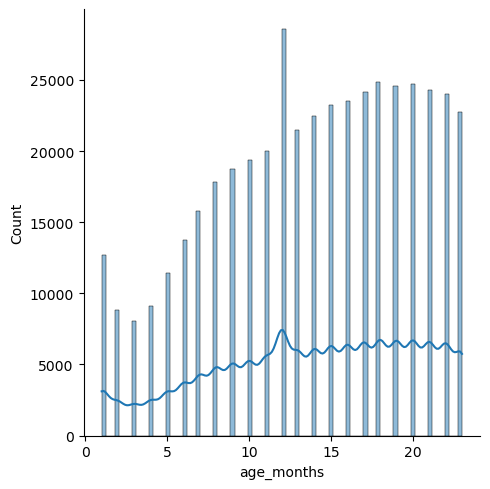

In [206]:
g = sns.displot(view['age_months'], kde=True)

Notes:
- The distribution steadily increases with an increase in age.
- The peak in the beginning could be explained by parents getting used to handling babies.
- The steady increase is likely due to children learning how to walk.
- The spike at 12 months is likely due to erroneous input--perhaps personnel inputting 12 months because they have forgotten what age the baby was. 

### Where did most injuries happen?

In [3]:
view = pd.read_sql(
'''

SELECT LOC, count(CPSC_Case_Number) as count
FROM all_neiss_x
LEFT JOIN LocationDim AS loc ON loc.Code = Location
GROUP BY LOC
ORDER BY count DESC

'''
,neiss_conn)
view

,LOC,count
0,HOME,3352026
1,UNK,2016290
2,SPORTS,916225
3,PUBLIC,464726
4,SCHOOL,382237
5,STREET,178503
6,FARM,4160
7,MOBILE,1855
8,INDST.,539


[]

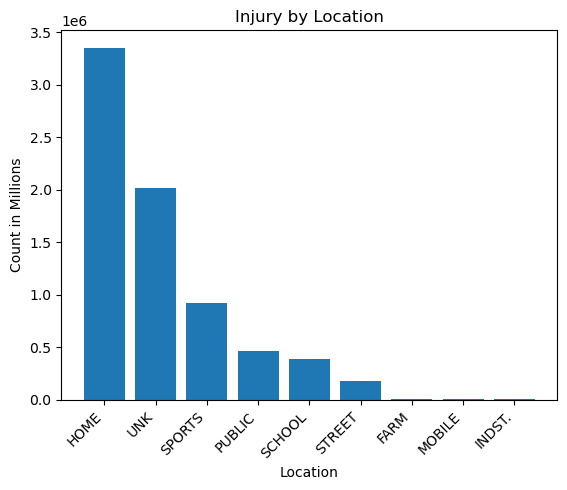

In [27]:
x = view['LOC']
y = view['count']

plt.bar(x,y)
plt.title('Injury by Location')
plt.xlabel('Location')
plt.ylabel('Count in Millions')
plt.xticks(rotation=45,ha='right')
plt.plot()

In [70]:
v = view[view['LOC']=='HOME'].iloc[0].values
x = view[view['LOC']=='SPORTS'].iloc[0].values 
z = view[(view['LOC']!='HOME') & (view['LOC']!='UNK')].sum()
print('Home/All: ',(v[1]/ z[1]))
print('Home/Sports: ',(v[1]/ x[1]))

Home/All:  1.720536174865071
Home/Sports:  3.6585183770362084


Notes:
- Most injuries happened at home.
- Home had 3.7 times the number of sports injuries, and 1.72 times the number of all other locations combined, not including those labelled as unknown.
- Industrial, farm, and mobile injuries were very low by comparison.

### What was the most commmon diagnosis?

In [30]:
# Create a view to combine the two diagnosis Columnsolumns 

neiss_conn.execute(
'''

CREATE VIEW neiss_diag AS
    SELECT *
        FROM 
            (SELECT all_neiss_x.*, Diagnosis as Diagnosis_All
            FROM all_neiss_x
            WHERE Diagnosis IS NOT NULL
            UNION ALL
            SELECT all_neiss_x.*, Diagnosis_2 as Diagnosis_All
            FROM all_neiss_x
            WHERE Diagnosis_2 IS NOT NULL)
    ORDER BY Treatment_Date

'''
)

This is the number of rows we should be expecting:

In [36]:
view = pd.read_sql(
'''

SELECT C1, C2, C1 + C2 as Total
    FROM (SELECT count(Diagnosis) as C1, count(Diagnosis_2) as C2
            FROM all_neiss_x)

'''
, neiss_conn)
view

,C1,C2,Total
0,7316561,280301,7596862


In [32]:
view = pd.read_sql(
'''

SELECT *
FROM neiss_diag

'''
, neiss_conn)
view

,index,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,...,Product_3,Narrative,Stratum,PSU,Weight,Other_Diagnosis,Other_Diagnosis_2,year,Product_All,Diagnosis_All
0,0,30102578,2003-01-01 00:00:00,33,1,1,None,NaN,30,57,...,0,33 YOWM WRECKED HIS 4-WHEELER ANS INJURED HIS ...,S,1,71.3643,None,None,2003,None,57.0
1,1,30102580,2003-01-01 00:00:00,3,1,1,None,NaN,75,53,...,0,3 YOWM FELL DOWN APPROX 3-4 WOODEN STEPS AND I...,S,1,71.3643,None,None,2003,None,53.0
2,2,30102586,2003-01-01 00:00:00,37,1,1,None,NaN,83,53,...,0,37 YOWM SUSTAINED AN ABRASION TO HIS FOOT FROM...,S,1,71.3643,None,None,2003,None,53.0
3,9,30102625,2003-01-01 00:00:00,43,1,2,None,NaN,79,64,...,0,"PT. WAS FOUND ON FLOOR AND COULDN'T GET UP, ET...",M,14,42.4038,None,None,2003,None,64.0
4,10,30102626,2003-01-01 00:00:00,51,2,2,None,NaN,35,64,...,0,"FELL DUE TO WET KITCHEN FLOOR AT HOME, LANDED ...",M,14,42.4038,None,None,2003,None,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596857,323081,230235679,2022-12-31 00:00:00,15,1,1,None,2.0,83,53,...,0,15YOM PRESENTS WITH LEFT FOOT INJURY WHEN HE L...,C,8,7.7789,None,None,2022,None,64.0
7596858,323083,230235681,2022-12-31 00:00:00,8,1,2,None,2.0,88,60,...,0,8YOM PRESENTS WITH DENTAL INJURY AFTER FALLING...,C,8,7.7789,None,None,2022,None,66.0
7596859,323084,230235682,2022-12-31 00:00:00,7,2,1,None,2.0,88,60,...,0,"7YOF WAS RIDING A HOVERBOARD WHEN SHE FELL, WA...",C,8,7.7789,None,PAIN,2022,None,71.0
7596860,323094,230235695,2022-12-31 00:00:00,212,1,3,MULTI-RACIAL,0.0,75,62,...,0,12MOM FELL DOWN 15 HARDWOOD STAIRS ONTO HARDWO...,C,8,7.7789,None,None,2022,None,59.0


#### Top Diagnoses

In [44]:
view = pd.read_sql(
'''

SELECT DIAG, count(CPSC_Case_Number) as count
FROM neiss_diag
LEFT JOIN DiagnosisDim ON Code = Diagnosis_All
GROUP BY DIAG
ORDER BY count DESC


'''
, neiss_conn)
view

,DIAG,count
0,59 - LACERATION,1439873
1,"53 - CONTUSIONS, ABR.",1169958
2,57 - FRACTURE,1168267
3,"64 - STRAIN, SPRAIN",1112022
4,71 - OTHER,949588
5,62 - INTERNAL INJURY,660834
6,56 - FOREIGN BODY,145340
7,52 - CONCUSSION,140794
8,55 - DISLOCATION,116689
9,68 - POISONING,102446


[]

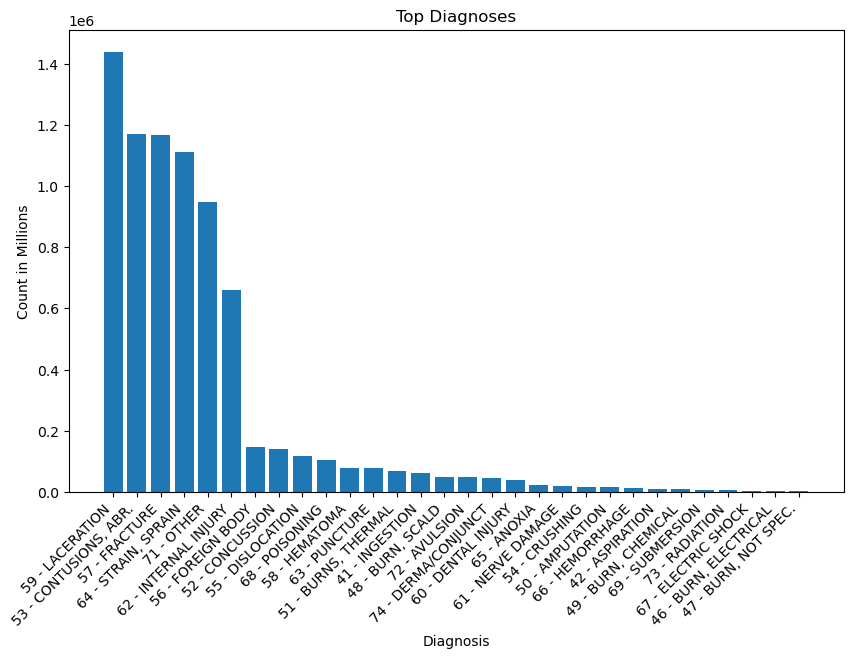

In [52]:
x = view['DIAG']
y = view['count']

plt.figure(figsize=(10,6))
plt.bar(x,y)

plt.title('Top Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count in Millions')
plt.xticks(rotation=45,ha='right')


plt.plot()

In [72]:
a = view[view['DIAG'].str.contains('59 - LAC')].iloc[0].values
a = a[1]
b = view[view['DIAG'].str.contains('62 - INT')].iloc[0].values
b = b[1]
print('LAC = ',a)
print('INT = ',b)
print('LAC / INT = ',a/b)

LAC =  1439873
INT =  660834
LAC / INT =  2.1788724551097554


Notes:

- The top diagnoses in order were, lacerations, contusions, fractures, strains/sprains, and internal injuries (ignoring other). These diagnoses stood in a group of their own above the remaining diagnoses, which included foreign body, concussion, dislocation, and poisoning.
- Lacerations are cuts or tears in the skin, while contusions are bruises. Internal injuries, unlike contusions, are not visible on the surface of the skin. They involve structural damage to internal organs or blood vessels. 
- Internal injuries are 660,834, about half of laceration injuries at 1,439,873.

<p style=color:red> Consider adding diagnosis by product here<p>

In [40]:
view = pd.read_sql(
'''

SELECT *
FROM DiagnosisDim

'''
, neiss_conn)
view

,Code,DIAG
0,41,41 - INGESTION
1,42,42 - ASPIRATION
2,46,"46 - BURN, ELECTRICAL"
3,47,"47 - BURN, NOT SPEC."
4,48,"48 - BURN, SCALD"
5,49,"49 - BURN, CHEMICAL"
6,50,50 - AMPUTATION
7,51,"51 - BURNS, THERMAL"
8,52,52 - CONCUSSION
9,53,"53 - CONTUSIONS, ABR."


In [ ]:
neiss_conn.execute('DROP VIEW neiss_bdy')